# Projeto Estatística I

### *Equipe:*

- Priscila G. Petroni
- Vinicius Paccola
- Rudá Aranha
- Wesley Rodrigues

# DataSet NBA Players
(Estatísticas biométricas, biográficas e básicas de pontuação de caixa da temporada de 1996 a 2022.)

Imagine poder mergulhar na rica história da NBA, analisando a evolução dos jogadores ao longo dos anos, desde suas performances em quadra até suas jornadas antes de chegarem à liga. O dataset que estamos explorando oferece um olhar detalhado sobre os principais aspectos dos atletas, como altura, peso, país de origem e o impacto que cada um teve nas temporadas que disputaram.

Além dos números, como pontos, rebotes e assistências, podemos ver como os jogadores se desenvolveram desde o draft e como as diferentes características influenciam seus desempenhos. Esta análise vai além das estatísticas, revelando tendências, padrões e como o basquete se transforma com o passar do tempo.

Fonte do Dataset selecionado: https://www.kaggle.com/datasets/justinas/nba-players-data

## Parte I - ESTATÍSTICA DESCRITIVA (data de entrega: 16/10/2024)

##### *Motivação do estudo:*
Como analista de dados de um time de basquete, nosso grupo foi incumbida de identificar um jogador promissor que possa ajudar a equipe a se destacar na próxima temporada. Embora ainda não saibamos para qual posição, focaremos em variáveis chave que melhor reflitam o desempenho geral de um jogador e que possam ser usadas independentemente da posição em quadra.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import uuid

In [104]:
# Carga de arquivo do Colab para o VS Code

# from google.colab import files
# uploaded = files.upload()

In [105]:
df = pd.read_csv('nba-players-data.csv', index_col=0)

### *Análise estrutural do Dataset:*
##### **Análise das Variáveis e Medidas de Resumo:**

Como analistas de dados para um time de basquete, é essencial que cada variável do dataset seja cuidadosamente analisada. Primeiro, começamos determinando o tipo de cada variável: algumas são numéricas, como "pontos por jogo", "alturas" e "pesos", enquanto outras são categóricas, como "time" e "universidade". Essa distinção é importante porque cada tipo de variável exige diferentes abordagens para análise estatística e visualização.

Usaremos gráficos adequados para apresentar essas variáveis. Para variáveis numéricas, histogramas nos ajudarão a entender a distribuição dos dados e identificar as medidas de resumo, como média e mediana, que indicarão a concentração dos dados. Para variáveis categóricas, gráficos de barras vão exibir as frequências e nos ajudarão a entender qual time ou jogador aparece com mais frequência no conjunto de dados.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           12844 no

##### **Variáveis (colunas) presentes neste conjunto de dados e descrição do tipo de cada uma delas**

| Colunas | Tipo | Descrição |
|----------|----------|----------|
| nome_do_jogador | Qualitativa nominal | Nome do jogador |
| team_abbreviation | Qualitativa nominal | Nome abreviado do time em que o jogador jogou (no final da temporada) |
| age | Quantitativa discreta | Idade do jogador |
| player_height | Quantitativa contínua | Altura do jogador (em centímetros) |
| player_weight | Quantitativa contínua | Peso do jogador (em quilogramas) |
| college | Qualitativa nominal | Nome da faculdade que o jogador frequentou |
| country | Qualitativa nominal | Nome do país em que o jogador nasceu (não necessariamente a nacionalidade) |
| draft_year | Quantitativa discreta | O ano em que o jogador foi convocado |
| draft_round | Quantitativa discreta | A rodada de draft em que o jogador foi escolhido |
| draft_number | Quantitativa discreta | O número em que o jogador foi escolhido em sua rodada de recrutamento |    
| gp (games played) | Quantitativa discreta | Jogos disputados ao longo da temporada |             
| pts (points) | Quantitativa contínua | Número médio de pontos marcados |      
| reb (rebounds) | Quantitativa contínua  | Número médio de rebotes obtidos |            
| ast (assists) | Quantitativa contínua | Número médio de assistências distribuídas |
| net_rating | Quantitativa contínua | Diferencial de pontos da equipe por 100 posses enquanto o jogador está em quadra |           
| oreb_pct (offensive rebound percentage) | Quantitativa contínua | Porcentagem de rebotes ofensivos disponíveis que o jogador pegou enquanto estava em quadra |          
| dreb_pct (defensive rebound percentage) | Quantitativa contínua | Porcentagem de rebotes defensivos disponíveis que o jogador pegou enquanto estava em quadra |       
| usg_pct (usage percentage) | Quantitativa contínua | Porcentagem de jogadas de equipe usadas pelo jogador enquanto ele estava em quadra ((FGA + Possession Ending FTA + TO) / POSS) |   
| ts_pct (true shot percentage) | Quantitativa contínua | Medida da eficiência de arremessos do jogador que leva em consideração lances livres, arremessos de 2 e 3 pontos (PTS / (2*(FGA + 0.44 * FTA))) |   
| ast_pct (assist percentage) | Quantitativa contínua | Porcentagem de assistências pelo jogador enquanto ele estava em quadra |    
| season | Qualitativa ordinal | Temporada da NBA |

In [107]:
df.head()

player_name team_abbreviation   age  player_height  player_weight  \
0  Randy Livingston               HOU  22.0         193.04      94.800728   
1  Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2      George Lynch               VAN  26.0         203.20     103.418976   
3    George McCloud               LAL  30.0         203.20     102.058200   
4      George Zidek               DEN  23.0         213.36     119.748288   

                 college country draft_year draft_round draft_number  ...  \
0        Louisiana State     USA       1996           2           42  ...   
1  Northwestern Oklahoma     USA       1994           2           34  ...   
2         North Carolina     USA       1993           1           12  ...   
3          Florida State     USA       1989           1            7  ...   
4                   UCLA     USA       1995           1           22  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 21 columns]

In [108]:
df.tail()

player_name team_abbreviation   age  player_height  player_weight  \
12839      Joel Embiid               PHI  29.0         213.36     127.005760   
12840  John Butler Jr.               POR  20.0         213.36      86.182480   
12841     John Collins               ATL  25.0         205.74     102.511792   
12842     Jericho Sims               NYK  24.0         208.28     113.398000   
12843   JaMychal Green               GSW  33.0         205.74     102.965384   

             college   country draft_year draft_round draft_number  ...   pts  \
12839         Kansas  Cameroon       2014           1            3  ...  33.1   
12840  Florida State       USA  Undrafted   Undrafted    Undrafted  ...   2.4   
12841    Wake Forest       USA       2017           1           19  ...  13.1   
12842          Texas       USA       2021           2           58  ...   3.4   
12843        Alabama       USA  Undrafted   Undrafted    Undrafted  ...   6.4   

        reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
12839  10.2  4.2         8.8     0.057     0.243    0.370   0.655    0.233   
12840   0.9  0.6       -16.1     0.012     0.065    0.102   0.411    0.066   
12841   6.5  1.2        -0.2     0.035     0.180    0.168   0.593    0.052   
12842   4.7  0.5        -6.7     0.117     0.175    0.074   0.780    0.044   
12843   3.6  0.9        -8.2     0.087     0.164    0.169   0.650    0.094   

        season  
12839  2022-23  
12840  2022-23  
12841  2022-23  
12842  2022-23  
12843  2022-23  

[5 rows x 21 columns]

##### **Estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão**

In [109]:
df.describe().T

count        mean        std         min       25%  \
age            12844.0   27.045313   4.339211   18.000000   24.0000   
player_height  12844.0  200.555097   9.111090  160.020000  193.0400   
player_weight  12844.0  100.263279  12.426628   60.327736   90.7184   
gp             12844.0   51.154158  25.084904    1.000000   31.0000   
pts            12844.0    8.212582   6.016573    0.000000    3.6000   
reb            12844.0    3.558486   2.477885    0.000000    1.8000   
ast            12844.0    1.824681   1.800840    0.000000    0.6000   
net_rating     12844.0   -2.226339  12.665124 -250.000000   -6.4000   
oreb_pct       12844.0    0.054073   0.043335    0.000000    0.0210   
dreb_pct       12844.0    0.140646   0.062513    0.000000    0.0960   
usg_pct        12844.0    0.184641   0.053545    0.000000    0.1490   
ts_pct         12844.0    0.513138   0.101724    0.000000    0.4820   
ast_pct        12844.0    0.131595   0.094172    0.000000    0.0660   

                     50%        75%        max  
age             26.00000   30.00000   44.00000  
player_height  200.66000  208.28000  231.14000  
player_weight   99.79024  108.86208  163.29312  
gp              57.00000   73.00000   85.00000  
pts              6.70000   11.50000   36.10000  
reb              3.00000    4.70000   16.30000  
ast              1.20000    2.40000   11.70000  
net_rating      -1.30000    3.20000  300.00000  
oreb_pct         0.04000    0.08300    1.00000  
dreb_pct         0.13050    0.17900    1.00000  
usg_pct          0.18100    0.21700    1.00000  
ts_pct           0.52500    0.56300    1.50000  
ast_pct          0.10300    0.17900    1.00000

##### **Análise dos Valores Ausentes no Dataset**

Sim, há valores ausentes no dataset, principalmente na coluna que informa a universidade que os jogadores frequentaram. Isso pode ocorrer por algumas razões:

> **Informação não registrada:** 

O jogador pode ter frequentado e jogado por uma universidade, mas essa informação não foi incluída no dataset.

> **Jogadores sem passagem por universidades:** 

Alguns jogadores não frequentaram nenhuma universidade antes de ingressar na NBA, o que pode ser verificado ao cruzar esses dados com a coluna de "draft_round" para identificar se eles foram "undrafted" (não selecionados no draft). Além disso, a nacionalidade dos jogadores pode influenciar essa ausência, já que é mais comum jogadores norte-americanos passarem pela universidade, enquanto atletas internacionais seguem diferentes caminhos para ingressar na liga.

> **Mudança na regra do draft:** 

Antes de 2006, era permitido que jogadores ingressassem na NBA diretamente após o ensino médio (High School). Após essa data, a regra foi alterada, exigindo que o jogador se inscrevesse no draft apenas um ano após a conclusão do ensino médio, sem obrigatoriedade de ter passado por uma universidade. Vários jogadores talentosos, como LeBron James e Kobe Bryant, ingressaram na liga sem ter frequentado uma universidade.
Dado esse contexto, não é necessário tratar esses valores ausentes, pois, em muitos casos, a ausência de dados na coluna de universidade reflete a trajetória legítima de alguns jogadores que não frequentaram a faculdade. Remover ou substituir esses valores poderia distorcer a análise, já que a ausência de passagem por uma universidade não é necessariamente um indicador negativo e não afeta o desempenho desses atletas em quadra.

Fontes:
- NBA Official: https://official.nba.com/
- Mudança de regras do Draft da NBA após 2006: https://olympics.com/pt/noticias/nba-draft-porque-novatos-nao-podem-pular-universidade

##### **Substituindo os valores nulos da coluna "college" por "Unknown"**

In [110]:
df["college"] = df["college"].fillna("Unknown")

In [111]:
# Verificando se há valores ausentes no dataset
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [112]:
# Mostrando as lihas que estão NaN
df[df.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [player_name, team_abbreviation, age, player_height, player_weight, college, country, draft_year, draft_round, draft_number, gp, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season]
Index: []

[0 rows x 21 columns]

##### **Verificando como as variáveis numéricas estão distribuídas**

In [113]:
# Filtrar apenas as colunas numéricas para o cálculo de correlação
df_numeric = df.select_dtypes(include='number')
#sns.pairplot(df_numeric)

**Correlação entre as variáveis numéricas**

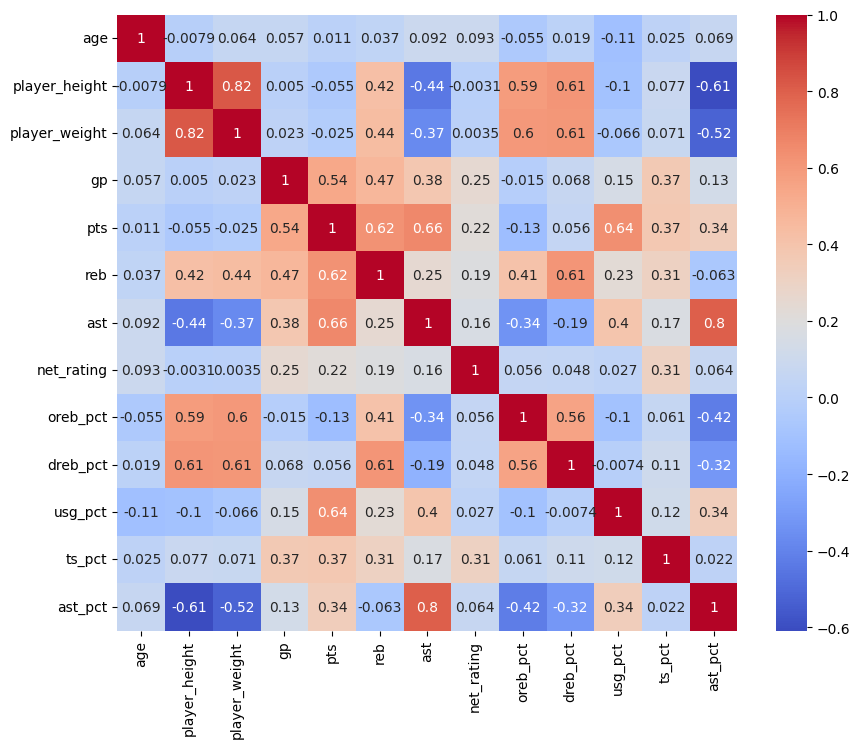

In [114]:
# Preencher temporariamente valores nulos com 0 para calcular a correlação
corr_matrix = df_numeric.corr().fillna(0)

# Criando uma matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##### **Análise descritiva das distribuições das variáveis numéricas**
**Verificando se os dados seguem uma distribuição normal para definir o coeficiente de correlação que será usado**

Os histogramas para variáveis numéricas ajudarão a visualizar a distribuição dos dados, permitindo identificar padrões, tendências e possíveis anomalias. Essas visualizações são essenciais para entender as características físicas dos jogadores disponíveis no dataset. Ao analisar esses dados, a equipe de analistas poderá determinar se os jogadores têm o perfil desejado para a posição que o time precisa, assim como identificar possíveis outliers que podem impactar a análise e a escolha do jogador ideal.

In [1]:
# importar o teste
from scipy.stats import shapiro

##### ***Teste Kolmogorov-Smirnov (K-S)***

Como nossa base de dados tem mais de 12.000 observações, o teste de Shapiro-Wilk (aula 8) pode não ser a melhor opção para verificar se os dados seguem uma distribuição normal. Isso ocorre porque, em amostras grandes, o teste tende a detectar até pequenas diferenças da normalidade, que podem não ser importantes na prática, mas ainda assim levam à rejeição da hipótese nula (H0), ou seja, sugerem que os dados não seguem uma distribuição normal. Com muitos dados, o valor-p (um valor que indica se devemos ou não rejeitar H0) se torna muito sensível, o que pode causar resultados que exageram a importância dessas pequenas diferenças.

Diante disso, pesquisamos outras alternativas que funcionam melhor para grandes volumes de dados. Um teste mais indicado para datasets grandes é o Teste de Kolmogorov-Smirnov (K-S). Esse teste é utilizado para comparar uma amostra com uma distribuição teórica (no nosso caso, a distribuição normal) e verifica se os dados seguem essa distribuição. Ele é bom porque analisa a forma dos dados ao longo de toda a distribuição. No entanto, assim como o teste de Shapiro-Wilk, o teste K-S também pode ser sensível a grandes amostras, identificando pequenas diferenças que, na prática, podem não ser significativas.

Aplicamos o Teste de Kolmogorov-Smirnov em todas as colunas do nosso conjunto de dados para ver se elas seguem a distribuição normal. Os resultados foram parecidos com os do teste de Shapiro-Wilk: em todas as colunas, rejeitamos a hipótese de normalidade.

Abaixo deixamos o código comentado para referência e mantivemos o teste de Shapiro-Wilk, que foi estudado em aula, para apresentar os resultados dos testes.

In [116]:
# from scipy.stats import kstest

# # Vamos verificar para cada coluna se a amostra vem de uma distribuição normal
# for coluna in df_numeric.columns:
#     # Teste de Kolmogorov-Smirnov para grandes datasets
#     test_stat, p = kstest(df_numeric[coluna], 'norm', alternative='two-sided')

#     if p < 0.05:
#         print(f"Rejeitamos H0: {coluna} não parece seguir uma distribuição normal.")
#     else:
#         print(f"Não rejeitamos H0: {coluna} parece seguir uma distribuição normal.")

#     # Plotando o histograma com a curva KDE
#     sns.histplot(data=df_numeric, x=coluna, kde=True)
#     plt.title(f"Distribuição da: {coluna}")
#     plt.show()

##### ***Teste Shapiro-Wilk***

Conforme mencionado acima, embora o teste de Kolmogorov-Smirnov (K-S) seja geralmente mais indicado para grandes conjuntos de dados (com mais de 5.000 observações), optamos por manter o teste de Shapiro-Wilk, que é amplamente reconhecido como um dos testes de normalidade mais comuns e confiáveis. Apesar de algumas recomendações indicarem que o teste de Shapiro-Wilk funciona melhor para amostras menores (geralmente com até algumas milhares de observações), ele ainda pode fornecer insights úteis sobre a normalidade dos dados em estudos práticos.

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


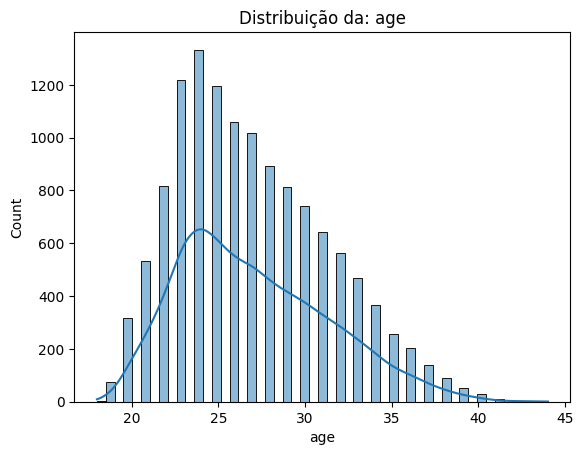

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


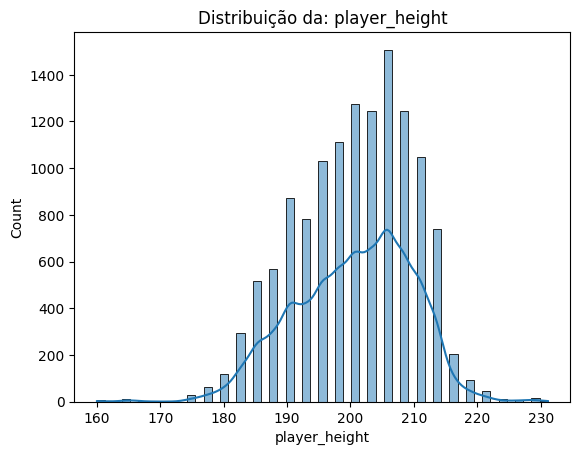

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


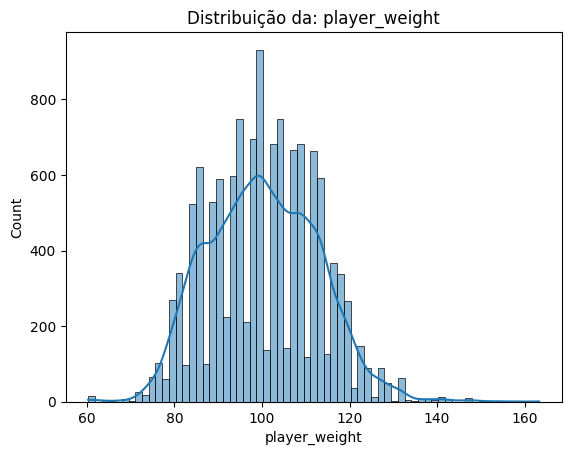

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


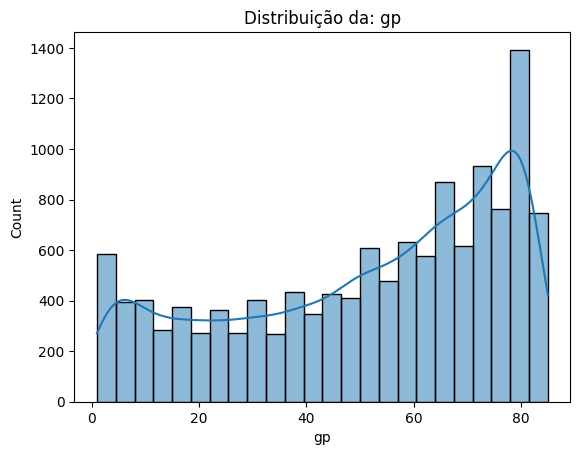

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


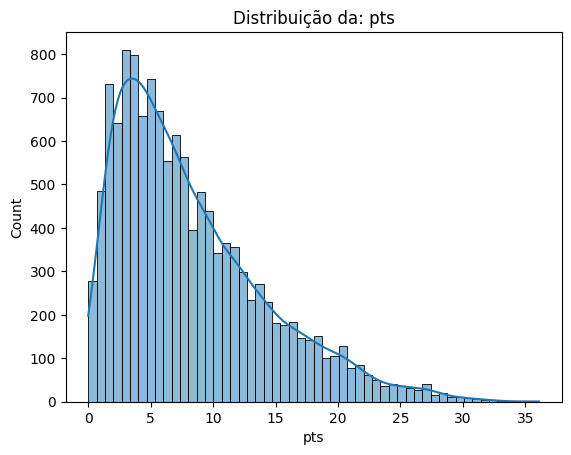

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


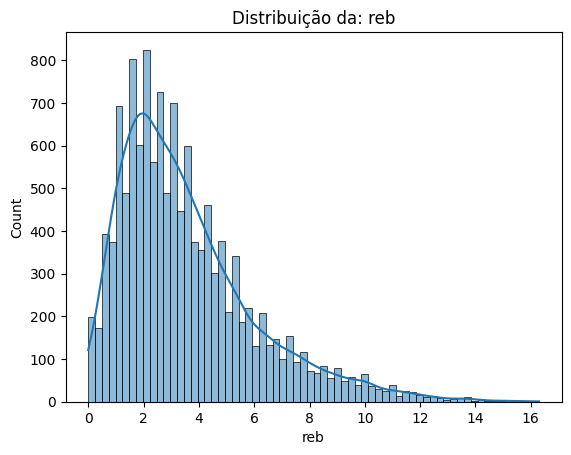

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


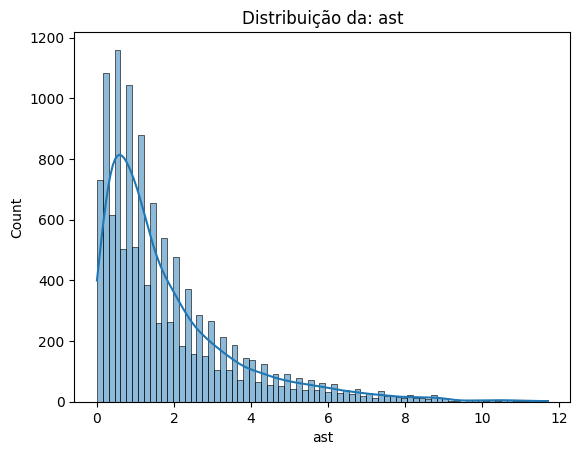

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


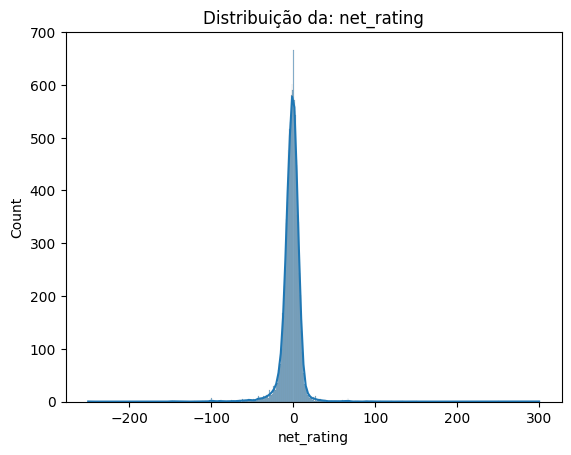

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


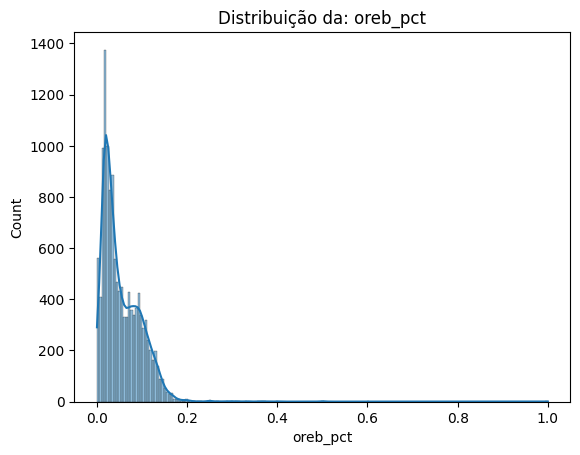

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


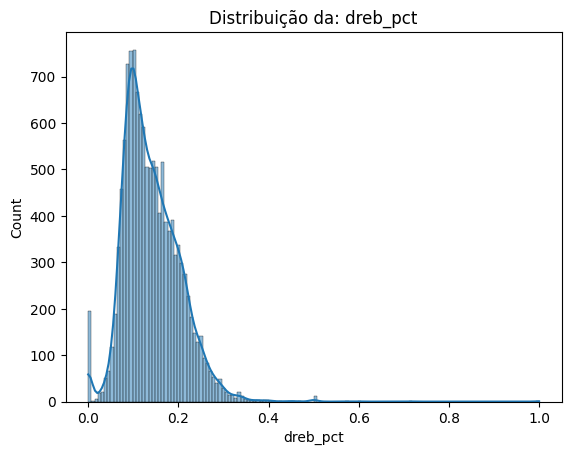

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


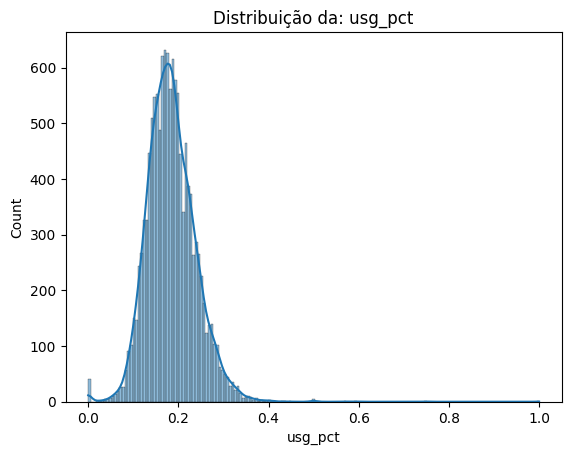

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


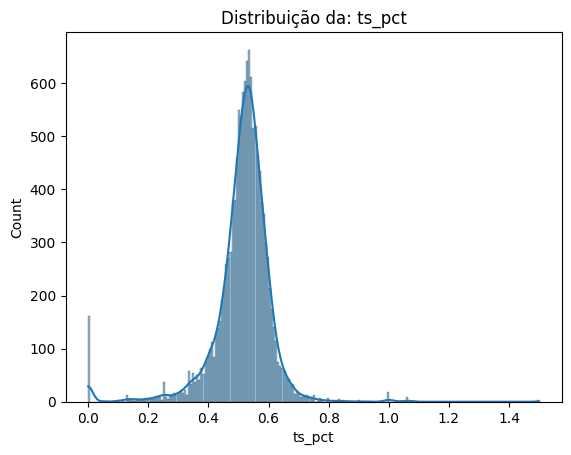

C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12844.
  res = hypotest_fun_out(*samples, **kwds)


Rejeitamos H0: distribuição não parece ser normal.


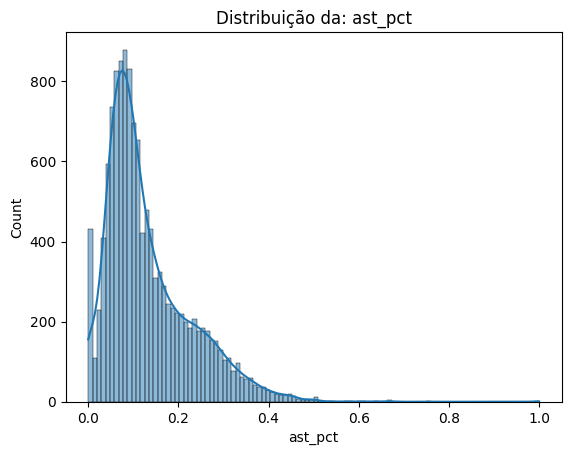

In [117]:
# Vamos verificar para cada coluna se a amostra vem de uma distribuição normal

for coluna in df_numeric.columns:
    test_stat, p = shapiro(df_numeric[coluna])

    if p < 0.05:
        print("Rejeitamos H0: distribuição não parece ser normal.")
    else:
        print("Não rejeitamos H0: distribuição parece ser normal.")

    sns.histplot(data = df,
                 x = coluna,
                 kde = True)
    plt.title(f"Distribuição da: {coluna}")
    plt.show()

##### **Analisando os gráficos (Shapiro-Wilk Test)**

Os histogramas apresentados forneceram uma visão detalhada das distribuições das principais métricas relacionadas ao desempenho dos jogadores da NBA. Vamos explorar as variáveis e conectar as observações ao contexto de nossa análise, que pode estar relacionado a identificar perfis de jogadores que se destacam em determinadas áreas de desempenho.

- *Age (Idade):* Observa-se uma distribuição assimétrica à direita, com a maioria dos jogadores concentrada entre 20 e 30 anos. Isso sugere que a liga é dominada por jogadores mais jovens, o que é esperado, considerando que o desempenho físico tende a atingir o pico nesse intervalo de idade.

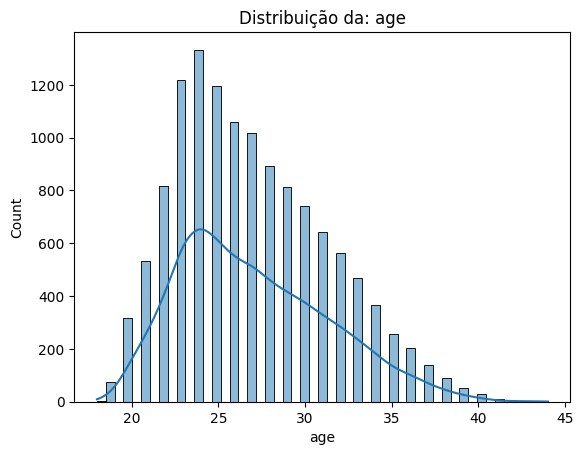

- *Player Height (Altura dos Jogadores):* A distribuição é aproximadamente normal, com a maioria dos jogadores tendo entre 190 cm e 210 cm de altura. A altura é um atributo crucial no basquete, e a concentração nesse intervalo mostra o perfil típico de jogadores da NBA.

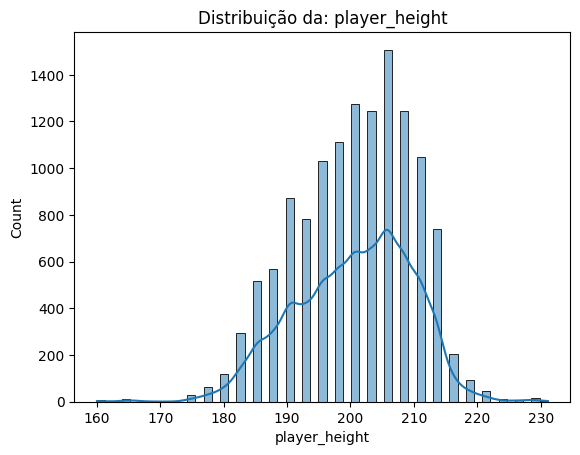

- *Player Weight (Peso dos Jogadores):* A distribuição do peso também apresenta uma curva próxima da normal, centrada em torno de 100 kg. Isso indica um equilíbrio entre a massa corporal e o desempenho atlético esperado em uma liga profissional como a NBA.

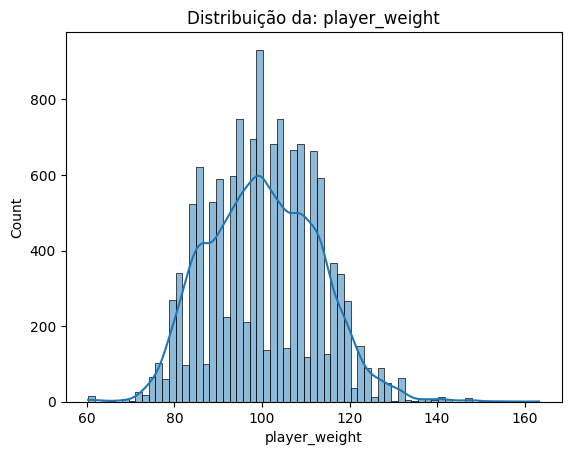

- *GP (Jogos Jogados):* A distribuição de jogos jogados ao longo da temporada mostra uma assimetria à direita, com um aumento na frequência à medida que os jogadores participam de mais jogos. Isso sugere que uma parte significativa dos jogadores participa de um número elevado de partidas, sendo o desempenho ao longo da temporada um fator importante para avaliar o impacto de um jogador.

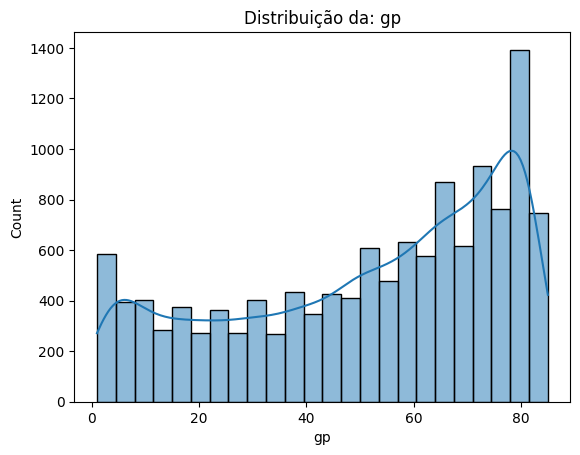

- *PTS (Pontos por Jogo):* Os pontos por jogo seguem uma distribuição fortemente assimétrica à direita, com a maioria dos jogadores marcando menos de 10 pontos por jogo. Apenas uma minoria significativa de jogadores ultrapassa essa marca, indicando que as estrelas da liga são responsáveis por uma proporção desproporcional dos pontos.

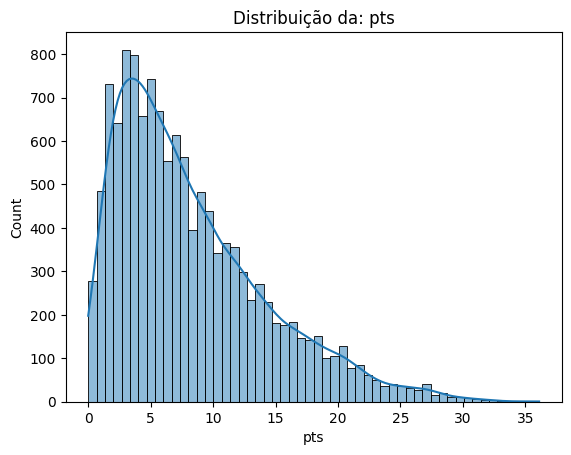

- *REB (Rebotes por Jogo):* Semelhante aos pontos, os rebotes também têm uma distribuição assimétrica à direita, onde a maioria dos jogadores contribui com poucos rebotes por jogo. Isso sugere que o domínio no rebote é concentrado em uma parcela específica de jogadores, como pivôs e alas-pivôs.

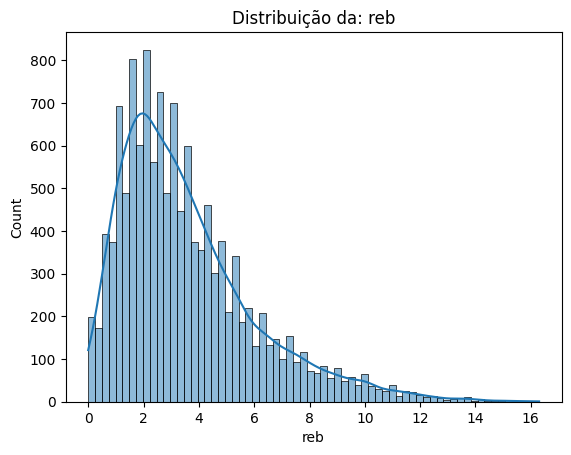

- *AST (Assistências por Jogo):* A distribuição de assistências segue um padrão similar, com a maioria dos jogadores registrando poucas assistências, refletindo o papel específico de armadores em contribuir com assistências enquanto outros jogadores têm responsabilidades diferentes.

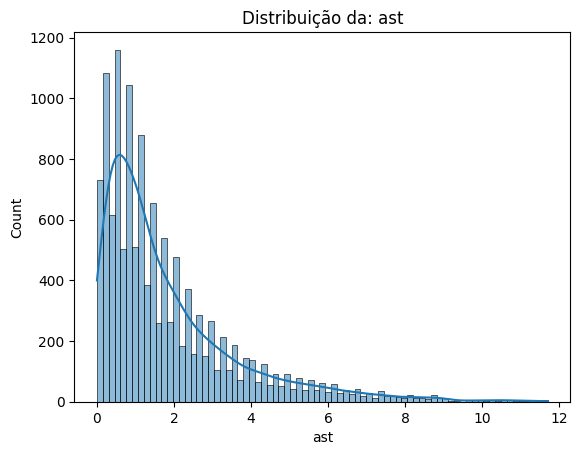

- *Net Rating:* Esta métrica apresenta uma concentração estreita em torno de 0, com poucos outliers em ambas as direções. Isso sugere que a maioria dos jogadores tem um impacto próximo da média no desempenho do time, com alguns jogadores se destacando por um impacto muito positivo ou muito negativo.

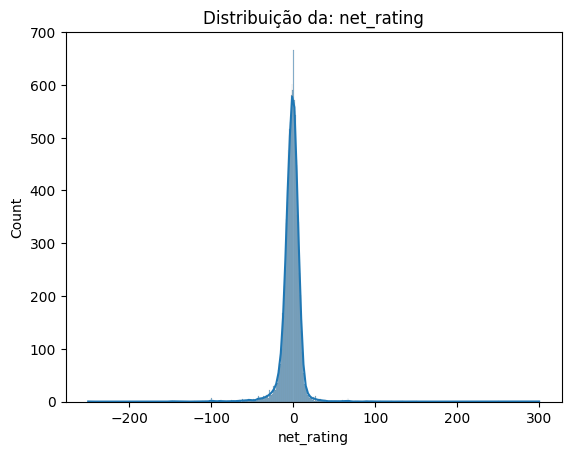

- *OREB_pct e DREB_pct (Percentuais de Rebotes Ofensivos e Defensivos):* Ambas as distribuições estão concentradas em torno de valores baixos, indicando que, em termos de porcentagem, apenas uma pequena parte dos jogadores tem alta participação no total de rebotes do time. Isso é esperado, pois apenas os jogadores especializados, como pivôs, geralmente dominam esses aspectos.

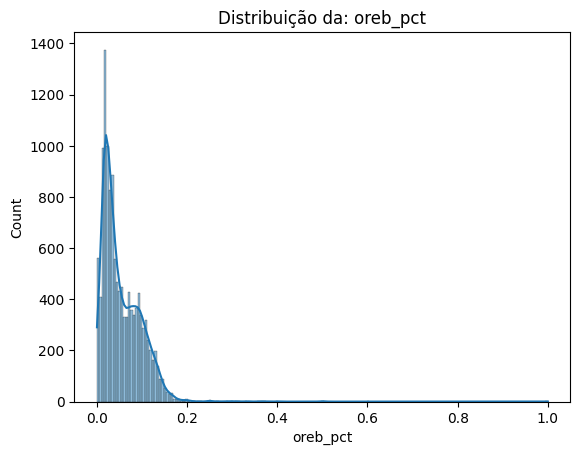 || 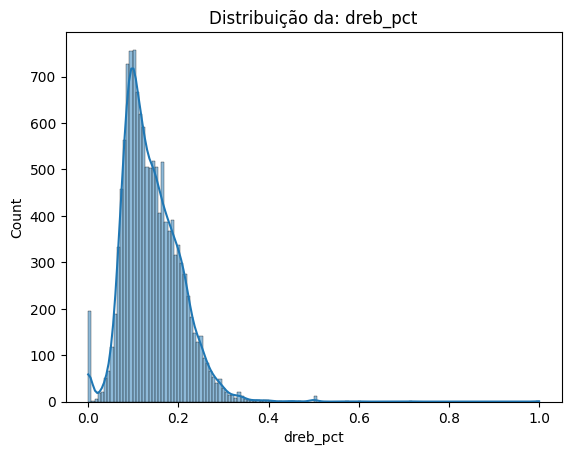

- *USG_pct (Porcentagem de Uso):* O uso da bola, que reflete a frequência com que o jogador está envolvido em jogadas ofensivas, tem uma distribuição que sugere que a maioria dos jogadores tem participação moderada, com uma cauda indicando jogadores que são usados com mais frequência nas jogadas, como armadores e estrelas ofensivas.

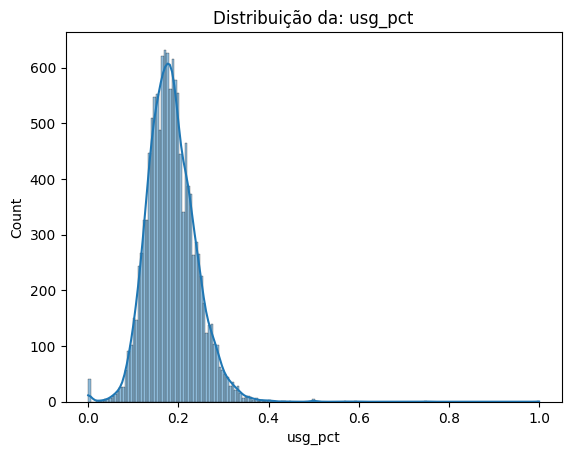

- *TS_pct (True Shooting Percentage):* A distribuição de TS% está concentrada em torno de valores mais altos, próximos de 0,6, indicando que os jogadores na liga mantêm uma eficiência de arremesso elevada. Essa métrica considera arremessos de dois e três pontos, além de lances livres, o que a torna um indicador confiável da eficácia de arremesso dos jogadores.

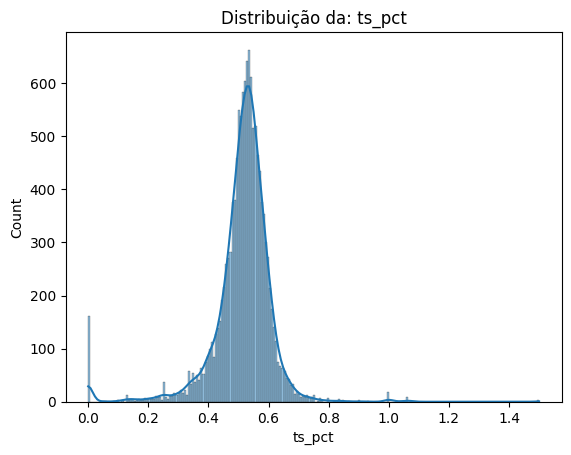

- *AST_pct (Percentual de Assistências):* Similar à distribuição de assistências por jogo, o percentual de assistências também é assimétrico, mostrando que a responsabilidade pela criação de jogadas está em uma pequena fração dos jogadores, como os armadores principais.

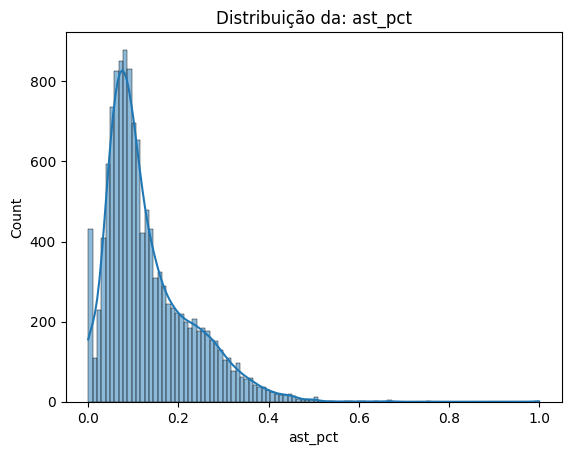

Como pudemos observar, nenhuma das colunas do nosso conjunto de dados segue uma distribuição normal. Diante disso, optamos por utilizar a correlação de Spearman, que é mais adequada para dados que não apresentam uma distribuição normal, pois leva em consideração a ordem dos valores em vez de pressupor linearidade ou normalidade nas variáveis.

___________________
___________________

#### **Trabalhando com menos variáveis:**

Durante a análise exploratória do dataset, identificamos a presença de várias colunas que contêm informações redundantes, como valores expressos tanto em números inteiros quanto em percentuais. Isso torna a visualização dos dados, como em gráficos pairplot e heatmap (apresentados acima), excessivamente densa e difícil de interpretar. Para melhorar a clareza e facilitar as análises, decidimos reduzir o tamanho do dataset, mantendo apenas as colunas essenciais para o estudo. Essa abordagem otimiza a qualidade das visualizações e ajuda a evitar a poluição visual, focando nos dados realmente relevantes.

In [118]:
# Deletando as colunas indesejadas
columns_to_delete = ['team_abbreviation', 'age', 'country', 'draft_year', 'draft_round', 'oreb_pct', 'dreb_pct', 'ast_pct']
df_updated = df.drop(columns=columns_to_delete)

# adicionando uma nova coluna ao dataframe apenas com o ano inicial da temporada
df_updated['season'] = df_updated['season'].str[:4].astype(int)

df_updated.head()

player_name  player_height  player_weight                college  \
0  Randy Livingston         193.04      94.800728        Louisiana State   
1  Gaylon Nickerson         190.50      86.182480  Northwestern Oklahoma   
2      George Lynch         203.20     103.418976         North Carolina   
3    George McCloud         203.20     102.058200          Florida State   
4      George Zidek         213.36     119.748288                   UCLA   

  draft_number  gp   pts  reb  ast  net_rating  usg_pct  ts_pct  season  
0           42  64   3.9  1.5  2.4         0.3    0.169   0.487    1996  
1           34   4   3.8  1.3  0.3         8.9    0.174   0.497    1996  
2           12  41   8.3  6.4  1.9        -8.2    0.175   0.512    1996  
3            7  64  10.2  2.8  1.7        -2.7    0.206   0.527    1996  
4           22  52   2.8  1.7  0.3       -14.1    0.195   0.500    1996

Após reduzir o dataset, agora vamos ajustar a coluna "draft_number", transformando os valores de jogadores não selecionados no draft, inicialmente categorizados como "Undrafted", em 0, o que facilita a padronização e interpretação dos dados. Além disso, o preenchimento dos valores ausentes com 0 e a conversão da coluna para números inteiros asseguram consistência no dataset, permitindo uma análise quantitativa mais precisa e comparativa no estudo do impacto do draft na carreira dos jogadores.

In [119]:
# Substituindo os valores 'Undrafted' por 0
df_updated['draft_number'] = df_updated['draft_number'].replace('Undrafted', 0)

# Transformando os valores NaN da coluna draft_round em 0
df_updated['draft_number'] = df_updated['draft_number'].fillna(0)

# Convertendo o tipo da coluna draft_round para int
df_updated['draft_number'] = df_updated['draft_number'].astype(int)

print(df_updated[['draft_number']])

       draft_number
0                42
1                34
2                12
3                 7
4                22
...             ...
12839             3
12840             0
12841            19
12842            58
12843             0

[12844 rows x 1 columns]


Por fim, esta é a nova estrutura do Dataset que será utilizado no estudo:

In [120]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12844 entries, 0 to 12843
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_name    12844 non-null  object 
 1   player_height  12844 non-null  float64
 2   player_weight  12844 non-null  float64
 3   college        12844 non-null  object 
 4   draft_number   12844 non-null  int64  
 5   gp             12844 non-null  int64  
 6   pts            12844 non-null  float64
 7   reb            12844 non-null  float64
 8   ast            12844 non-null  float64
 9   net_rating     12844 non-null  float64
 10  usg_pct        12844 non-null  float64
 11  ts_pct         12844 non-null  float64
 12  season         12844 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 1.4+ MB


##### **Verificando como as variáveis numéricas estão distribuídas no novo Dataset (reduzido)**

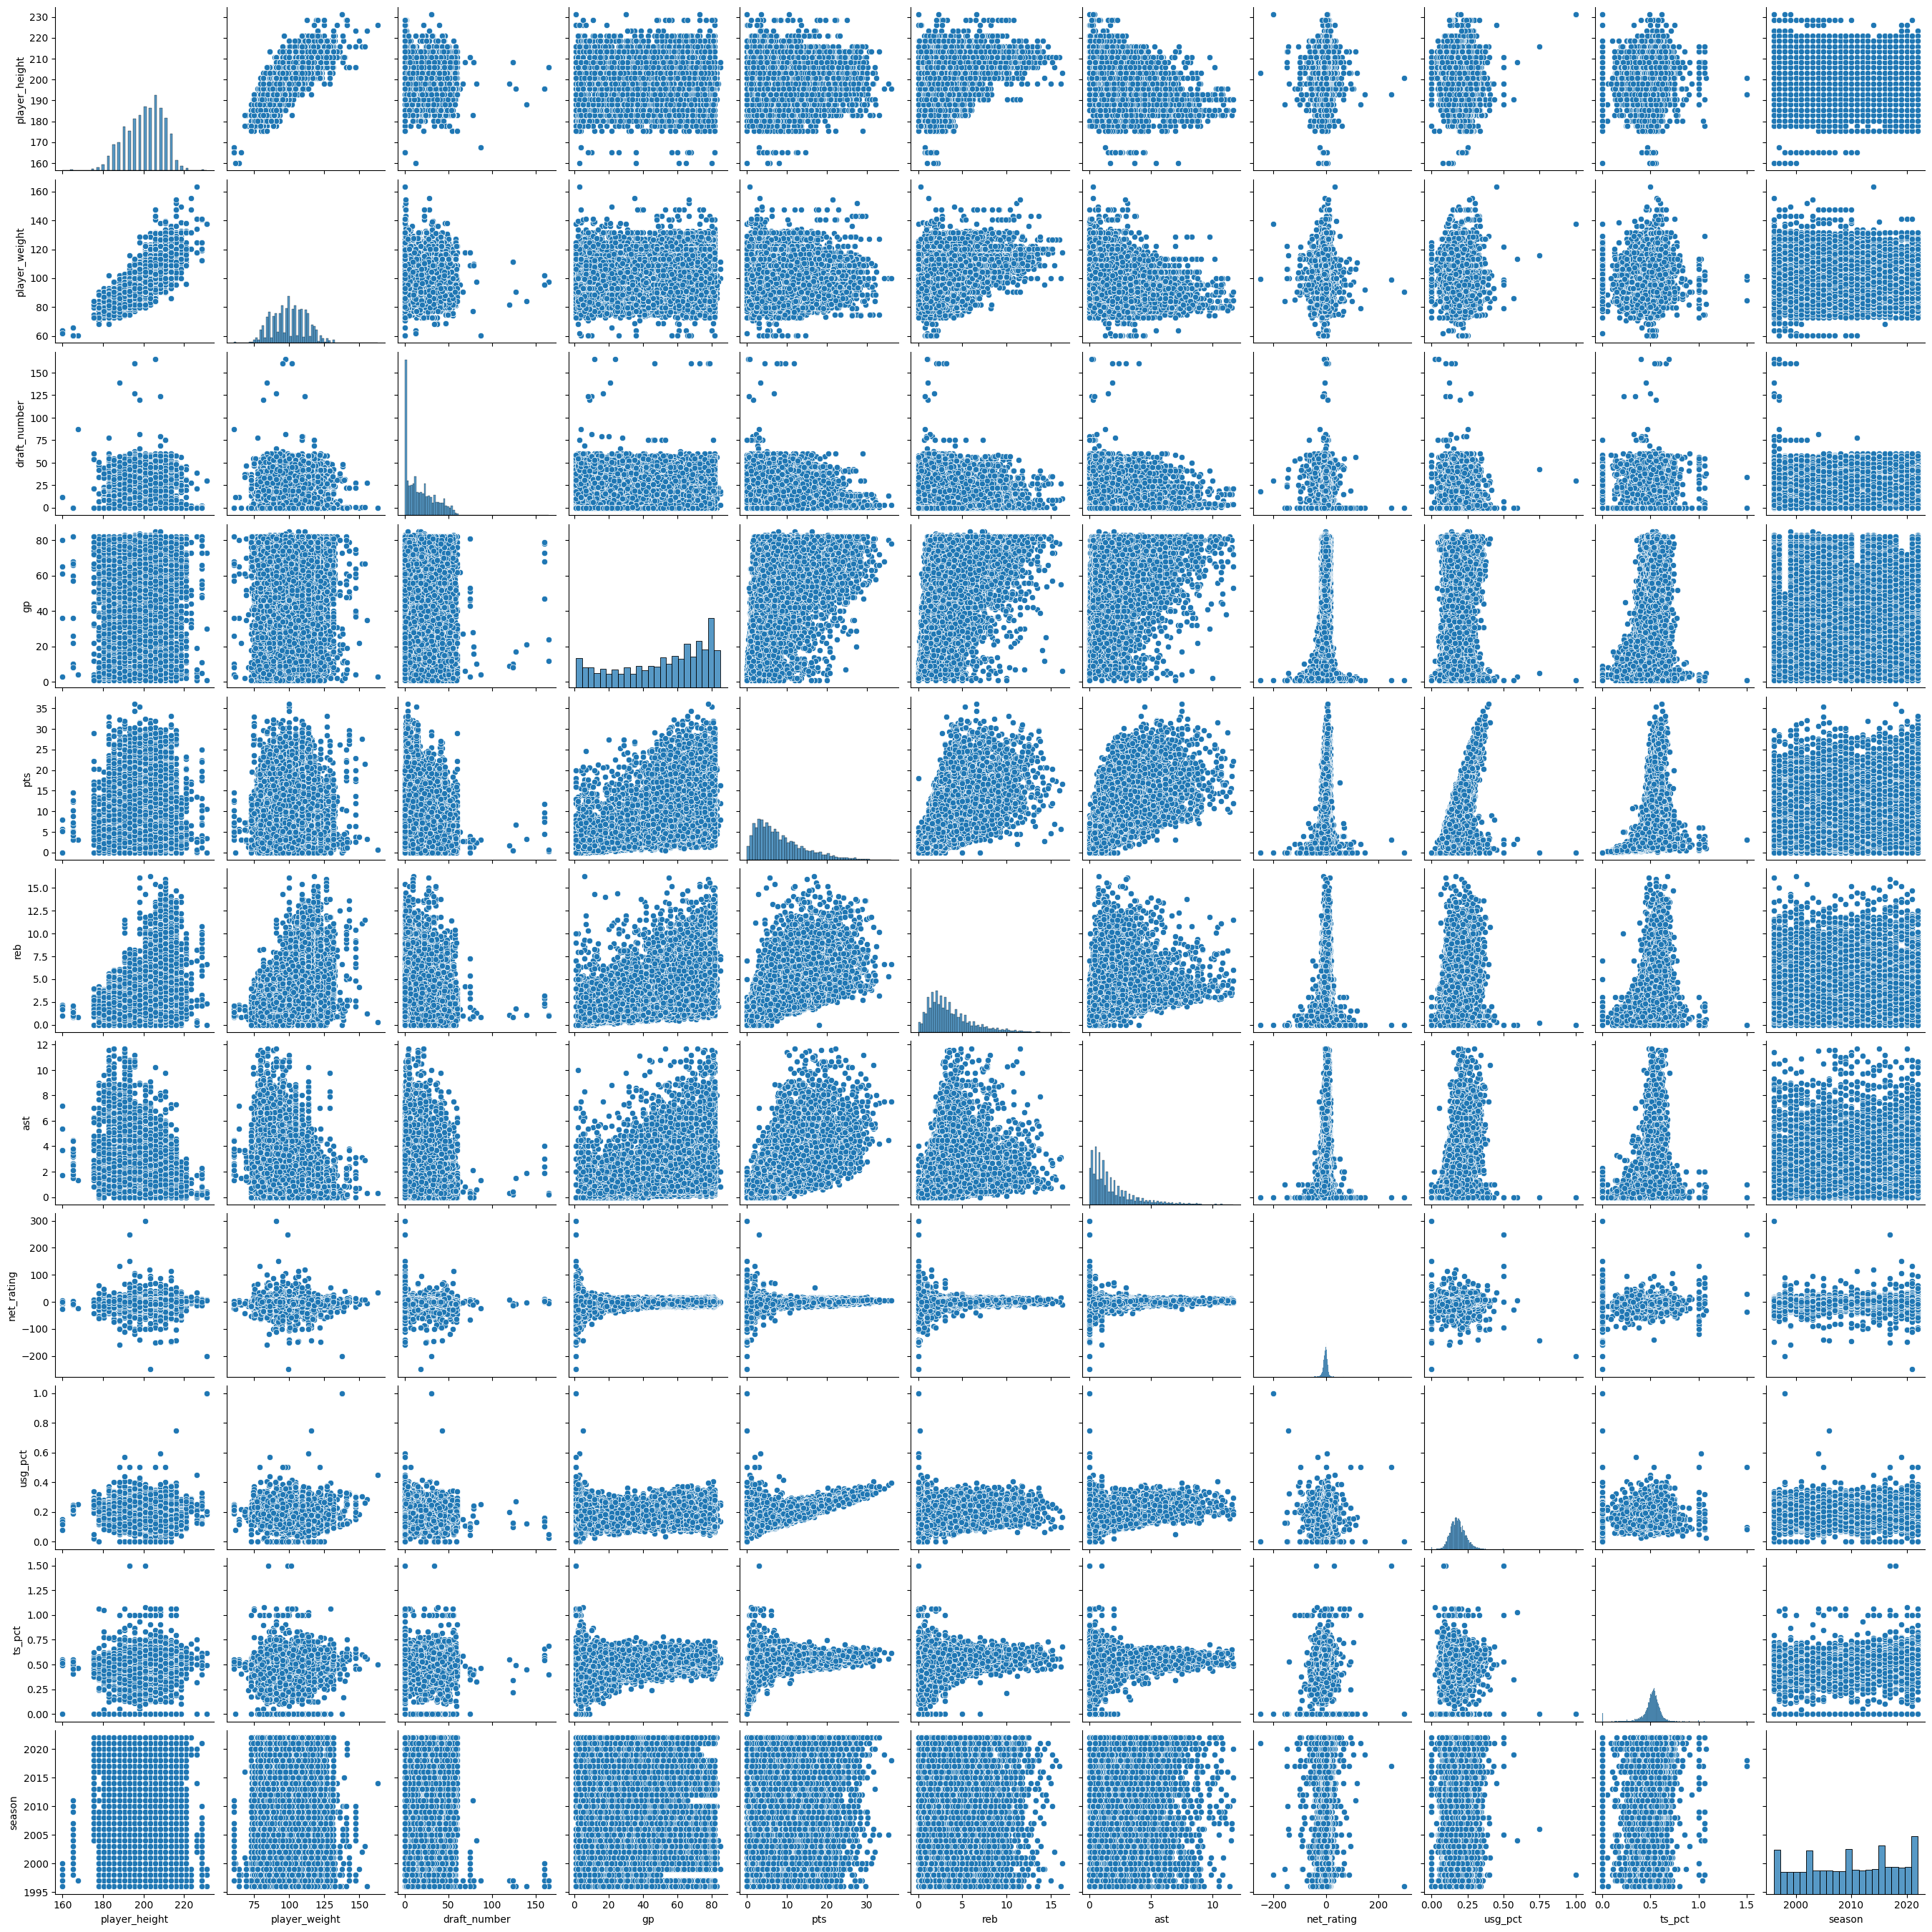

In [121]:
# Filtrar apenas as colunas numéricas para o cálculo de correlação no df_updated
df_numeric_updated = df_updated.select_dtypes(include='number')

# Criar o pairplot para o df_updated
sns.pairplot(df_numeric_updated)


##### **Correlação das variáveis numéricas**

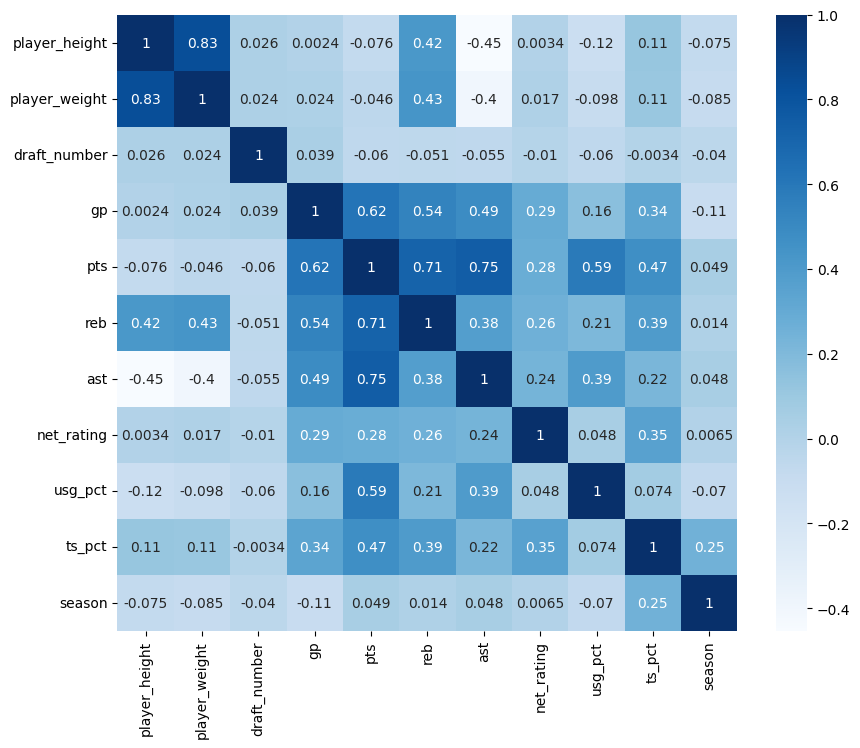

In [122]:
# Criar a matriz de correlação com as colunas numéricas
corr_matrix_updated = df_numeric_updated.corr(method = 'spearman')

# Criar o heatmap com a matriz de correlação atualizada
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_updated, annot=True, cmap='Blues')
plt.show()


A matriz de correlação revela alguns padrões interessantes:

- **Altura e peso** apresentam uma correlação moderada e positiva com o número de **rebotes**, o que é esperado, pois jogadores mais altos e pesados têm uma vantagem física na coleta de rebotes.
- Embora o **net_rating** tenha uma correlação positiva com variáveis como **pontos, rebotes e assistências**, essa correlação é fraca. Isso indica que esses fatores, isoladamente, não têm uma influência significativa na definição do net_rating de um jogador.
- Não há uma correlação forte entre **assistências** e variáveis físicas, como **altura e peso**, o que sugere que a habilidade de passar a bola está mais relacionada a habilidades técnicas e visão de jogo do que a características físicas.

Essa análise nos dá uma visão inicial sobre como algumas características estão relacionadas, permitindo aprofundar em outras variáveis de maior impacto no desempenho geral dos jogadores.

##### **Verificando a relação entre as variáveis de altura e peso**

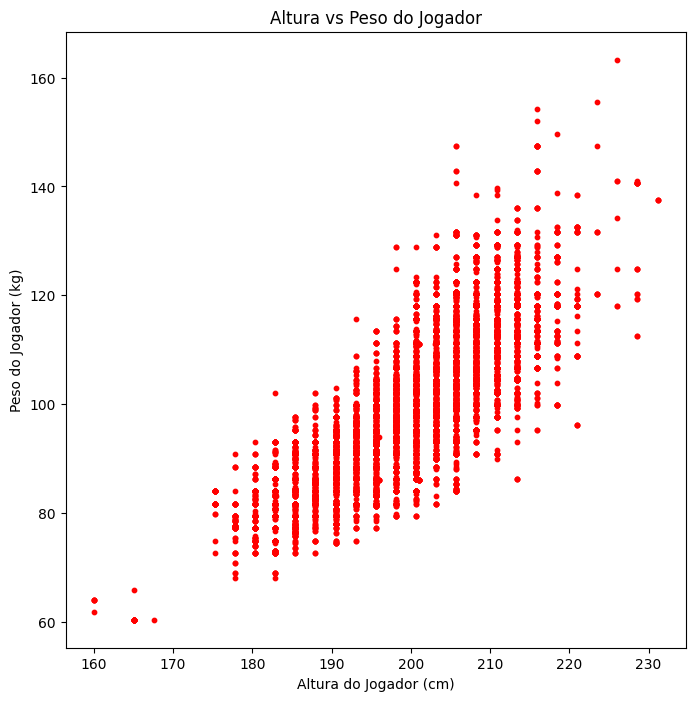

In [123]:
plt.figure(figsize=(8,8))
ax = plt.axes()

ax.scatter(df.player_height, df.player_weight,s=10,c='r')

ax.set(xlabel='Altura do Jogador (cm)',
       ylabel='Peso do Jogador (kg)',
       title='Altura vs Peso do Jogador');

O gráfico apresenta uma relação direta entre a altura e o peso dos jogadores. Observa-se que, à medida que a altura aumenta, o peso dos jogadores também tende a aumentar. Isso indica que existe uma correlação positiva entre essas duas variáveis. No entanto, é importante ressaltar que a relação não é perfeita, ou seja, existem jogadores mais altos e mais leves, assim como jogadores mais baixos e mais pesados. Essa dispersão dos dados sugere que outros fatores, além da altura, podem influenciar o peso dos jogadores.

Em resumo, em geral, jogadores mais altos tendem a ser mais pesados, mas há variações individuais que não seguem exatamente essa tendência.

##### **Análise do desempenho global dos Jogadores**

Além das variáveis analisadas acima, vamos também estudar quatro variáveis que são essenciais para medir o desempenho global de um jogador: Pontos por jogo (PTS), Rebotes (REB), Assistências (AST) e Eficiência de arremesso (TS_PCT). Essas características refletem as contribuições ofensivas e defensivas que um jogador pode trazer ao time.

- Pontos por jogo (PTS): Mostra o desempenho ofensivo do jogador.
- Rebotes (REB): Indicativo da capacidade de recuperação da bola.
- Assistências (AST): Reflete a habilidade do jogador em criar oportunidades para os colegas.
- Eficiência de arremesso (TS_PCT): Demonstra a precisão nos arremessos, o que é importante para medir a eficiência do jogador.

In [124]:
# Selecionando as colunas 'pts', 'reb', 'ast', 'ts_pct' do dataset df_updated
df_selected = df_updated[['pts', 'reb', 'ast', 'ts_pct']]

# Exibindo as estatísticas descritivas do novo dataset
print(df_selected.describe().T)

          count      mean       std  min    25%    50%     75%   max
pts     12844.0  8.212582  6.016573  0.0  3.600  6.700  11.500  36.1
reb     12844.0  3.558486  2.477885  0.0  1.800  3.000   4.700  16.3
ast     12844.0  1.824681  1.800840  0.0  0.600  1.200   2.400  11.7
ts_pct  12844.0  0.513138  0.101724  0.0  0.482  0.525   0.563   1.5


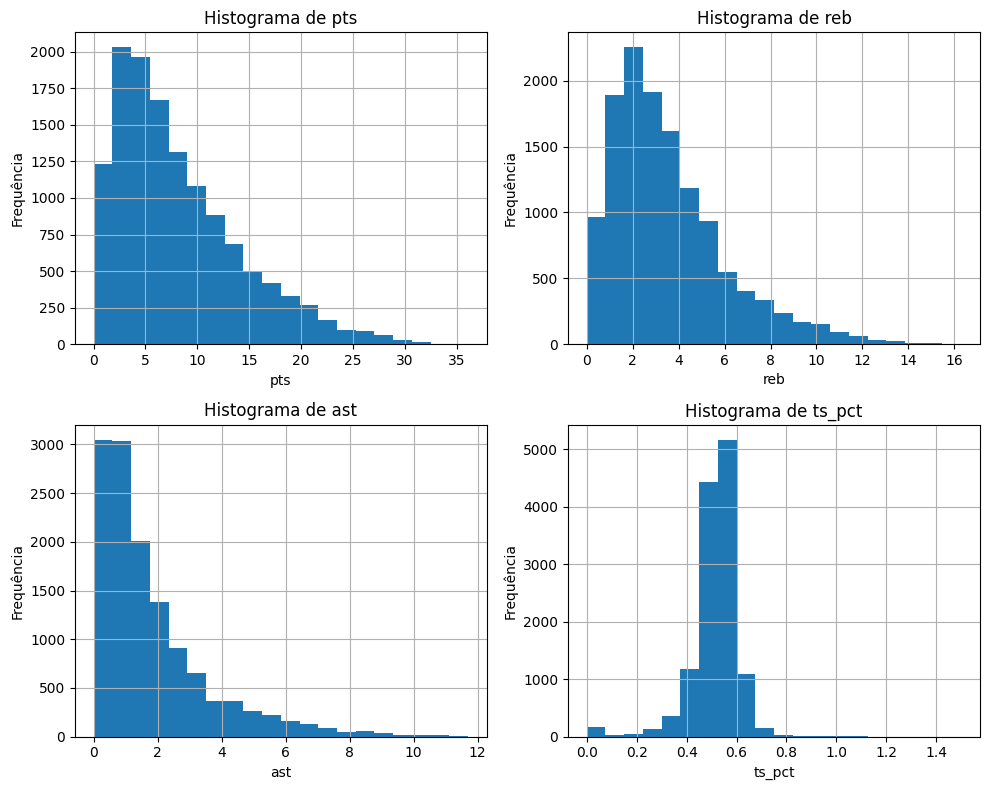

In [125]:
# Plotando histogramas
axes = df_selected.hist(figsize=(10, 8), bins=20)
for ax, column in zip(axes.flatten(), df_selected.columns):
    ax.set_xlabel(column)
    ax.set_ylabel('Frequência')
    ax.set_title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

A distribuição dos pontos, rebotes e assistências dos jogadores apresenta um viés para valores mais baixos, indicando que a maioria dos jogadores contribui com um número menor de pontos, rebotes e assistências por jogo. A eficiência de arremesso (TS_PCT), por sua vez, se concentra em torno de um valor central, sugerindo que a maioria dos jogadores possui uma eficiência de arremesso similar. Essa análise preliminar indica que há uma grande variabilidade no desempenho individual dos jogadores, com alguns atletas se destacando em determinadas áreas (como pontuação ou rebotes) e outros apresentando um desempenho mais equilibrado.

##### **Agrupando as pontuações, rebotes e assistências feitas pelos jogadores por altura**

In [126]:
height_pts = df.groupby(['player_height'])[['pts','reb','ast']].sum().reset_index()
print(height_pts)

    player_height      pts     reb     ast
0          160.02     23.9     9.1    21.7
1          165.10    101.2    16.3    38.1
2          167.64      3.0     0.8     1.3
3          175.26    288.7    53.4    86.5
4          177.80    372.2   104.9   209.5
5          180.34    788.7   179.2   366.2
6          182.88   2691.2   630.1  1109.1
7          183.00      1.9     0.6     1.0
8          185.42   4737.3  1186.9  1914.4
9          187.96   4412.6  1098.7  1652.3
10         190.50   8306.1  2063.4  3006.8
11         193.04   6633.1  1886.0  1947.4
12         195.58   8337.7  2608.9  1888.2
13         196.00     15.6     5.6     3.1
14         198.12   9353.9  3278.8  1989.2
15         200.66  11075.7  4247.5  2044.5
16         201.00     71.7    35.1    12.2
17         203.00      0.0     1.5     0.0
18         203.20  10549.7  4820.5  1855.5
19         205.74  11438.1  6590.1  1680.9
20         208.28   9430.7  5591.6  1322.6
21         210.82   8359.0  5714.9  1199.9
22         

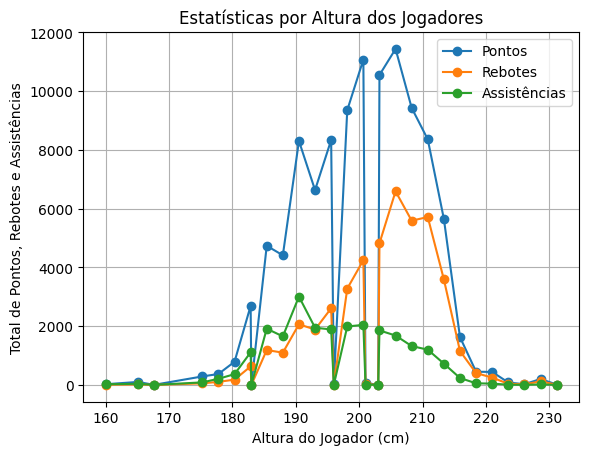

In [127]:
# Criando o gráfico de linha para as três colunas (pts, reb, ast)
plt.plot(height_pts['player_height'], height_pts['pts'], label='Pontos', marker='o')
plt.plot(height_pts['player_height'], height_pts['reb'], label='Rebotes', marker='o')
plt.plot(height_pts['player_height'], height_pts['ast'], label='Assistências', marker='o')

# Adicionando rótulos e título
plt.title('Estatísticas por Altura dos Jogadores')
plt.xlabel('Altura do Jogador (cm)')
plt.ylabel('Total de Pontos, Rebotes e Assistências')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

Essa análise foi feita para ver como a altura do jogador influenciava nos pontos marcados pelos jogadores e como mostra o gráfico tende a seguir uma distribuição que parece ser normal.

##### **Análise da frequência de jogadores no conjunto de dados**

Ao observar a frequência com que determinados jogadores aparecem no dataset da NBA, identificamos que atletas como Vince Carter (22 vezes), Dirk Nowitzki (21 vezes), e LeBron James (20 vezes) estão entre os que mais figuram na base de dados. Esse fato não apenas destaca a longevidade desses jogadores na liga, mas também reflete sua consistência em alto nível ao longo de várias temporadas.

Quando pensamos em contratar um jogador para o nosso time, é crucial considerar não apenas o desempenho em uma única temporada, mas também a capacidade do jogador de se manter competitivo ao longo dos anos. Jogadores como os citados são exemplos de resiliência, durabilidade e impacto contínuo no jogo. Essas características são essenciais para garantir que a contratação de um atleta possa gerar resultados a longo prazo, contribuindo não apenas em quadra, mas também como líderes que influenciam a cultura e a coesão do time.

Portanto, ao selecionar um jogador para ajudar o time a conquistar a próxima temporada, levar em conta a consistência e a longevidade de carreira pode ser um diferencial estratégico.


In [128]:
# Jogadores aparecem diversas vezes
df_updated['player_name'].value_counts()

player_name
Vince Carter      22
Dirk Nowitzki     21
Jamal Crawford    20
Udonis Haslem     20
Kobe Bryant       20
                  ..
Jason Preston      1
Jared Rhoden       1
Jamaree Bouyea     1
Jamal Cain         1
Jalen Williams     1
Name: count, Length: 2551, dtype: int64

In [129]:
# Contagem de quantas vezes os jogadores aparecem e exibe os 10 primeiros
top_10_jogadores = df_updated['player_name'].value_counts().head(10)

# Exibindo o top 10 jogadores
print(top_10_jogadores)


player_name
Vince Carter      22
Dirk Nowitzki     21
Jamal Crawford    20
Udonis Haslem     20
Kobe Bryant       20
Kevin Garnett     20
LeBron James      20
Jason Terry       19
Tim Duncan        19
Tyson Chandler    19
Name: count, dtype: int64


Devido a repetição dos jogadores com base na temporada foi atribuido uma id a cada jogador para não enviesar o resultado da análise de nacionalidade

In [130]:
# generating unique id for each player
df['Player_ID'] = [uuid.uuid5(uuid.NAMESPACE_DNS,
                                       f"{player_name}_{college}_{draft_year}_{player_height}").hex
                           for player_name, college, draft_year, player_height
                           in zip(df['player_name'],
                                 df['college'],
                                 df['draft_year'],
                                 df['player_height'])]

In [131]:
country_player_counts = df.groupby(['country'])['Player_ID'].nunique().reset_index()
country_player_counts.head()

country  Player_ID
0     Angola          2
1  Argentina         14
2  Australia         38
3    Austria          2
4    Bahamas          6

##### **Análise da quantidade de nacionalidades dos jogadores**

In [132]:
country_wise_sorting = country_player_counts.sort_values(by='Player_ID', ascending=False)

C:\Users\priga\AppData\Local\Temp\ipykernel_10104\2507032084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player_ID', y='country', data=top_10_countries, palette='viridis')


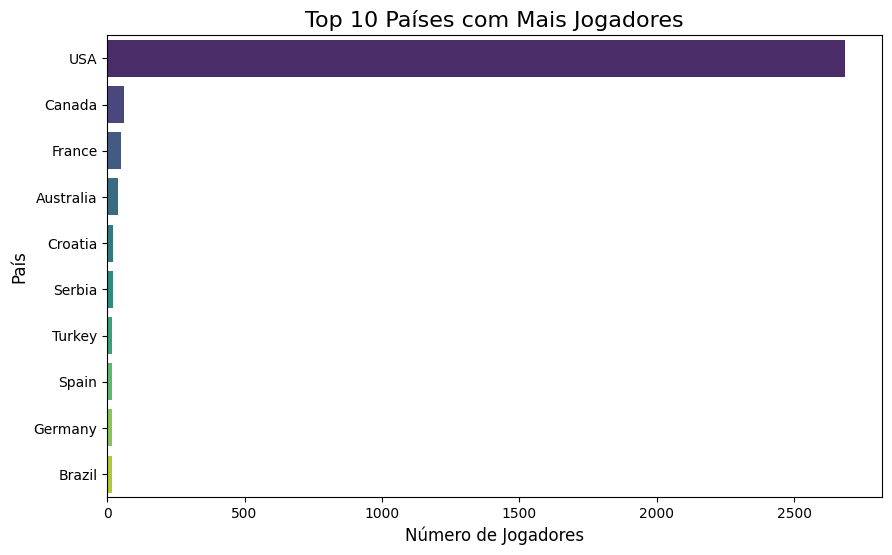

In [133]:
# Selecionando o top 10 países com mais jogadores
top_10_countries = country_wise_sorting.head(10)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Player_ID', y='country', data=top_10_countries, palette='viridis')

# Adicionando títulos e rótulos
plt.title('Top 10 Países com Mais Jogadores', fontsize=16)
plt.xlabel('Número de Jogadores', fontsize=12)
plt.ylabel('País', fontsize=12)

plt.show()

Com esse gráfico é possivel notar a presença esmagadora de jogadores do USA na liga enquanto nenhum outro país apresenta uma quantidade notável de jogadores na liga

##### **Análise por temporadas (season)**

In [134]:
df_season = df_updated.groupby('season').agg({'player_name': 'count', 'pts': 'sum', 'reb': 'sum', 'player_height': 'mean', 'player_weight': 'mean', 'ts_pct': 'mean'}).reset_index()

#incluir duas colunas no dataframe: pts/player_height e reb/player_height

df_season['pts_per_player'] = df_season['pts'] / df_season['player_name']
df_season['reb_per_player'] = df_season['reb'] / df_season['player_name']
df_season

season  player_name     pts     reb  player_height  player_weight  \
0     1996          441  3539.5  1564.0     200.994830     100.526270   
1     1997          439  3489.0  1543.7     200.619499     100.265530   
2     1998          439  3230.4  1502.0     200.903007     100.639563   
3     1999          438  3497.8  1599.6     200.920959     100.735741   
4     2000          441  3444.8  1596.0     200.752154     100.842450   
5     2001          440  3512.4  1598.8     201.017909     101.288124   
6     2002          428  3359.5  1538.1     201.520514     102.032765   
7     2003          442  3423.5  1583.9     201.315113     101.635395   
8     2004          464  3752.9  1660.1     201.245733     101.697477   
9     2005          458  3656.0  1595.4     200.920655     101.340178   
10    2006          458  3759.6  1604.4     200.704367     101.329284   
11    2007          451  3728.5  1613.7     200.851486     100.941821   
12    2008          445  3784.2  1610.9     201.196539     101.393611   
13    2009          442  3788.7  1616.7     200.873394     101.140341   
14    2010          452  3709.2  1606.4     201.217832     101.634022   
15    2011          478  3790.0  1702.9     200.832343     101.055087   
16    2012          469  3732.3  1652.0     200.769765     100.872778   
17    2013          482  3899.5  1698.5     200.772946     100.549591   
18    2014          492  3996.3  1743.3     200.838455     100.438213   
19    2015          476  3974.3  1723.4     200.949034     100.414022   
20    2016          486  4095.4  1732.7     200.916790      99.830930   
21    2017          540  4406.6  1823.9     200.457741      98.811657   
22    2018          530  4565.2  1915.0     200.535396      98.570677   
23    2019          529  4616.3  1921.7     198.941059      98.531501   
24    2020          540  4828.9  1962.9     198.914926      98.240467   
25    2021          605  4985.2  2085.4     198.350909      97.336345   
26    2022          539  4916.4  1909.8     199.265121      97.828602   

      ts_pct  pts_per_player  reb_per_player  
0   0.505206        8.026077        3.546485  
1   0.496599        7.947608        3.516401  
2   0.480806        7.358542        3.421412  
3   0.494678        7.985845        3.652055  
4   0.488728        7.811338        3.619048  
5   0.493041        7.982727        3.633636  
6   0.483479        7.849299        3.593692  
7   0.487251        7.745475        3.583484  
8   0.502110        8.088147        3.577802  
9   0.506205        7.982533        3.483406  
10  0.510854        8.208734        3.503057  
11  0.513111        8.267184        3.578049  
12  0.520861        8.503820        3.620000  
13  0.522520        8.571719        3.657692  
14  0.513781        8.206195        3.553982  
15  0.500220        7.928870        3.562552  
16  0.504271        7.957996        3.522388  
17  0.510535        8.090249        3.523859  
18  0.509970        8.122561        3.543293  
19  0.524588        8.349370        3.620588  
20  0.525870        8.426749        3.565226  
21  0.529011        8.160370        3.377593  
22  0.530755        8.613585        3.613208  
23  0.537871        8.726465        3.632703  
24  0.544180        8.942407        3.635000  
25  0.523787        8.240000        3.446942  
26  0.560584        9.121336        3.543228

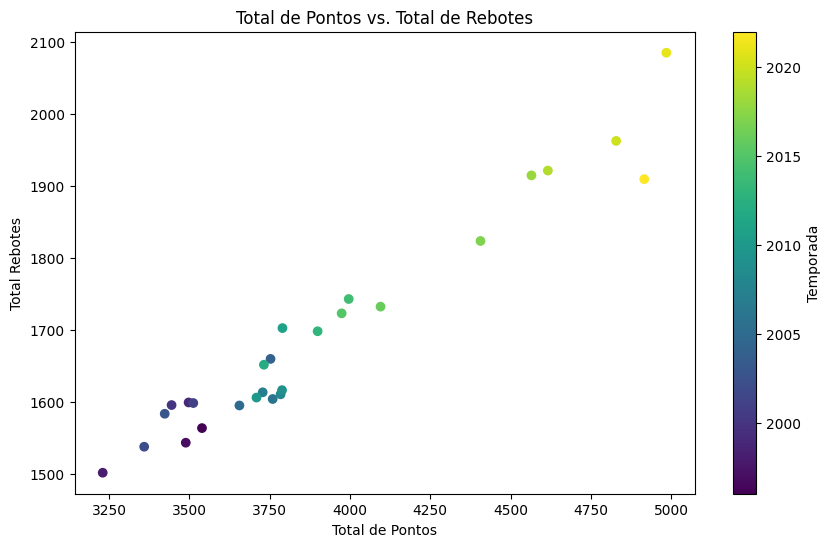

In [135]:
# Pontos X Rebotes por Temporada

plt.figure(figsize=(10, 6))
plt.scatter(df_season['pts'], df_season['reb'], c=df_season['season'], cmap='viridis')
plt.xlabel('Total de Pontos')
plt.ylabel('Total Rebotes')
plt.title('Total de Pontos vs. Total de Rebotes')
plt.colorbar(label='Temporada')

plt.show()

O gráfico mostra uma relação positiva entre o número total de pontos e o número total de rebotes ao longo das temporadas. À medida que o número de pontos aumenta, o número de rebotes também tende a aumentar. A cor dos pontos representa a temporada, indicando uma tendência de aumento gradual em ambas as estatísticas ao longo dos anos. Essa relação sugere que jogadores que marcam mais pontos geralmente também conseguem mais rebotes, indicando um perfil de jogador mais completo e dominante. No entanto, é importante ressaltar que outros fatores, como posição em quadra, estilo de jogo e características físicas dos jogadores, podem influenciar essa relação e gerar exceções.

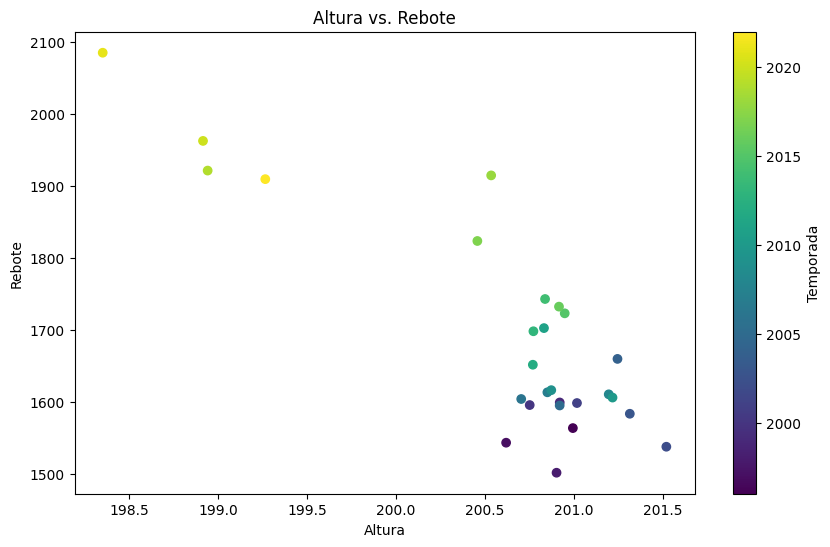

In [136]:
# Altura X Rebotes por Temporada

plt.figure(figsize=(10, 6))
plt.scatter(df_season['player_height'], df_season['reb'], c=df_season['season'], cmap='viridis')
plt.xlabel('Altura')
plt.ylabel('Rebote')
plt.title('Altura vs. Rebote')
plt.colorbar(label='Temporada')
plt.show()

O gráfico demonstra uma relação direta entre a altura dos jogadores e a quantidade de rebotes que eles conseguem. Jogadores mais altos, na faixa dos 200 centímetros, tendem a obter um número maior de rebotes. Essa correlação é esperada, pois a altura proporciona uma vantagem física para alcançar a bola e dominá-la no garrafão. A cor dos pontos, que representa a temporada, sugere que essa tendência se mantém ao longo dos anos, com jogadores mais altos consistentemente dominando as estatísticas de rebote. No entanto, é importante ressaltar que outros fatores, como envergadura, força física e tempo de jogo, também influenciam a capacidade de um jogador em pegar rebotes.

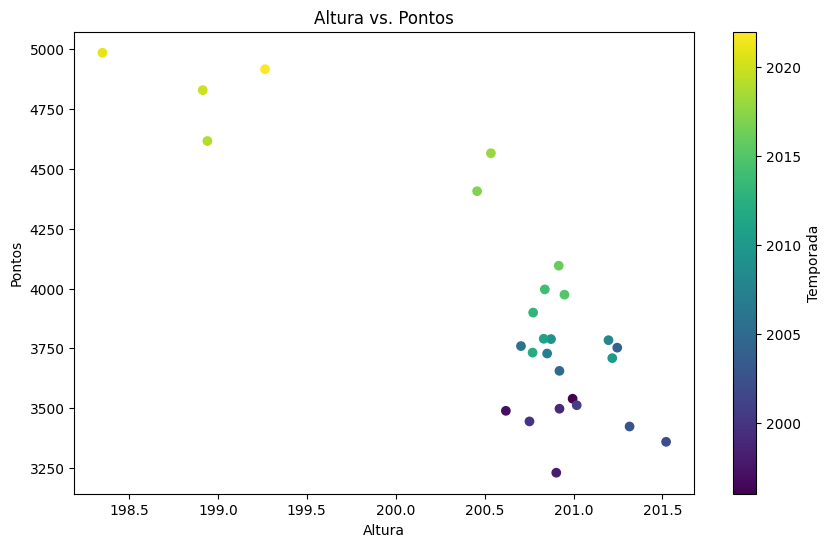

In [137]:
# Altura X Pontos por Temporada

plt.figure(figsize=(10, 6))
plt.scatter(df_season['player_height'], df_season['pts'], c=df_season['season'], cmap='viridis')
plt.xlabel('Altura')
plt.ylabel('Pontos')
plt.title('Altura vs. Pontos')
plt.colorbar(label='Temporada')
plt.show()

O gráfico demonstra uma relação interessante entre a altura dos jogadores e a quantidade de pontos que eles marcam. Observa-se que, em geral, jogadores mais altos tendem a marcar mais pontos. Essa tendência indica que a altura pode ser uma vantagem na hora de finalizar as jogadas e conquistar pontos. No entanto, a relação não é linear e existem exceções, com alguns jogadores mais baixos conseguindo pontuar muito bem. A cor dos pontos, que representa a temporada, sugere que essa tendência se mantém ao longo dos anos. É importante ressaltar que a altura é apenas um dos muitos fatores que influenciam a capacidade de um jogador de pontuar, e que habilidades como arremesso, drible e visão de jogo também desempenham um papel crucial.

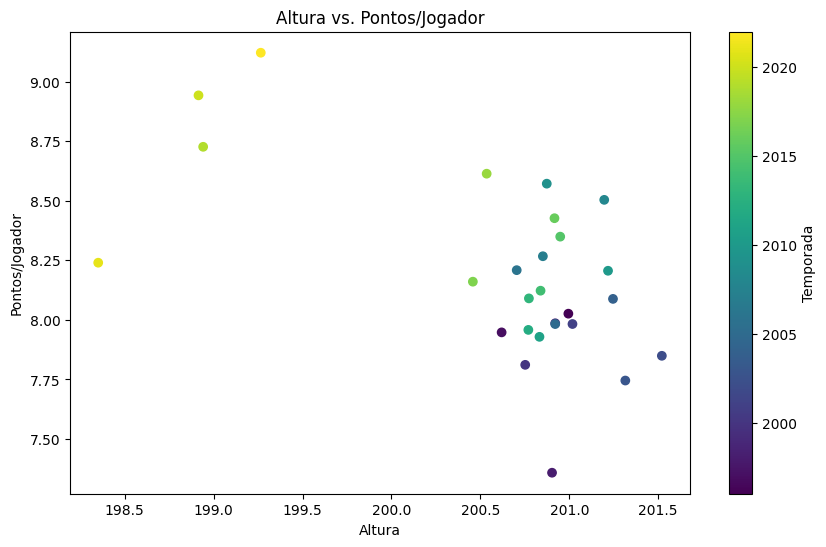

In [138]:
# Altura X Pontos por Jogador por Temporada

plt.figure(figsize=(10, 6))
plt.scatter(df_season['player_height'], df_season['pts_per_player'], c=df_season['season'], cmap='viridis')
plt.xlabel('Altura')
plt.ylabel('Pontos/Jogador')
plt.title('Altura vs. Pontos/Jogador')
plt.colorbar(label='Temporada')
plt.show()

O gráfico sugere uma leve tendência de que jogadores mais altos tendem a marcar mais pontos por jogo. No entanto, essa relação não é forte e existem muitas exceções. A altura pode oferecer vantagens físicas, como alcance maior para arremessos e melhor visão de quadra, mas outras habilidades como habilidade de arremesso, drible e inteligência de jogo também desempenham um papel crucial na pontuação. A cor dos pontos, que representa a temporada, indica que essa tendência se mantém ao longo dos anos. Em resumo, é possivel ver uma leve correlação positiva entre altura e pontuação, mas a relação não é forte e existem muitas exceções. A altura pode ser um fator vantajoso, mas não é o único determinante do desempenho ofensivo de um jogador.

##### **Outliers**

A análise de outliers é uma etapa essencial ao estudar o desempenho de jogadores. Outliers são valores que se destacam por serem muito diferentes dos outros no conjunto de dados, e podem ter um impacto significativo nos resultados da análise.

**Impacto nas Médias e Desvios:** Outliers podem distorcer medidas como a média e o desvio padrão. No contexto de análise de desempenho de jogadores, um outlier pode indicar um jogador que teve uma performance extremamente boa ou extremamente ruim. Ignorar esses valores pode levar a conclusões que não refletem o padrão de desempenho da maioria dos jogadores.

**Identificação de Jogadores de Destaque:** Em dados esportivos, outliers podem ser indicativos de jogadores excepcionais. Por exemplo, jogadores com um número de temporadas significativamente maior que os demais, ou com um desempenho notavelmente superior, podem ser identificados como candidatos potenciais para contribuir com a equipe. Esses outliers positivos podem revelar atletas que possuem o diferencial necessário para elevar o time a um novo nível.

**Erros de Dados:** Além disso, a análise de outliers pode revelar possíveis erros de coleta ou entrada de dados. Valores muito discrepantes podem ter sido causados por inconsistências no processo de coleta e precisam ser investigados para garantir que a análise esteja baseada em dados corretos.

**Tomada de Decisões Informada:** A identificação de outliers também é relevante para a tomada de decisões. No processo de contratação de novos jogadores, é importante considerar aqueles que apresentam um desempenho fora do comum. Outliers positivos podem indicar jogadores com um potencial de impacto significativo no time, enquanto outliers negativos podem sinalizar riscos que precisam ser avaliados com cautela.

Assim, ao examinar cuidadosamente os outliers no dataset, é possível refinar a análise, garantindo que as decisões sejam tomadas com base em dados mais precisos e representativos do desempenho real dos jogadores.

In [139]:
dicionario_outliers = {}
for coluna in df_numeric.columns:
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)

    iqr = q3 - q1

    dicionario_outliers[coluna] = len(df[(df[coluna] < q1 - 1.5*iqr) | (df[coluna] > q3 + 1.5*iqr)])

In [140]:
dicionario_outliers

{'age': 47,
 'player_height': 19,
 'player_weight': 57,
 'gp': 0,
 'pts': 298,
 'reb': 524,
 'ast': 841,
 'net_rating': 622,
 'oreb_pct': 76,
 'dreb_pct': 137,
 'usg_pct': 210,
 'ts_pct': 842,
 'ast_pct': 405}

In [141]:
df_outliers = pd.DataFrame(dicionario_outliers, index = [0])

<Axes: >

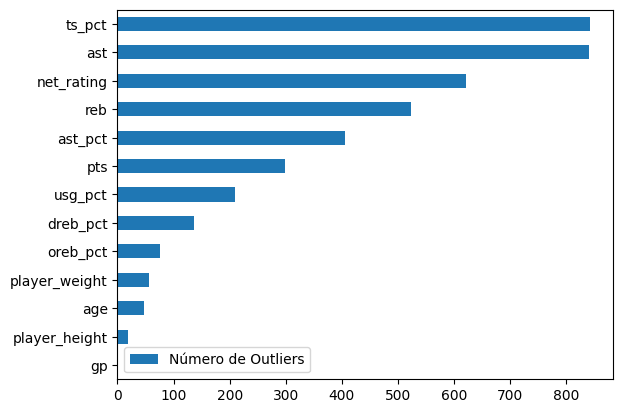

In [142]:
df_outliers.transpose().rename({0:"Número de Outliers"}, axis = 1).sort_values(by="Número de Outliers").plot(kind="barh")

Aqui podemos ver que as variáveis relacionadas a assistências (ast, ast_pct), pontuação (pts, usg_pct) e avaliação geral do jogador (net_rating) apresentam um número significativamente maior de outliers em comparação com outras variáveis como altura, peso e idade. Isso sugere que há uma maior dispersão e variabilidade nos dados dessas métricas, indicando que o desempenho de diferentes jogadores nesses aspectos pode variar amplamente e que existem jogadores com performances excepcionais ou abaixo da média nessas áreas. Em contrapartida, as variáveis relacionadas a altura, peso e idade apresentam um número menor de outliers, indicando uma distribuição de dados mais concentrada e menos variável. Essa análise sugere que a altura, peso e idade tendem a ser características mais homogêneas entre os jogadores, enquanto as estatísticas de desempenho, como pontos e assistências, podem variar consideravelmente de jogador para jogador.

##### **Método do z-score**

O Z-Score é uma ferramenta importante na análise de desempenho de jogadores, pois mede quantos desvios padrão um valor está distante da média, permitindo identificar outliers, ou seja, jogadores que se destacam por terem desempenhos muito acima ou abaixo da média. Isso é crucial para selecionar jogadores que podem trazer impacto positivo ao time, ajudando a destacar aqueles com performances excepcionais ou a identificar atletas que não estão alcançando o nível esperado.

Além disso, o Z-Score padroniza diferentes métricas, permitindo compará-las de forma justa, mesmo que tenham unidades distintas, como pontos e rebotes. Com essa análise, a tomada de decisões se torna mais eficiente, focando nos jogadores com maior potencial de contribuição ao sucesso da equipe.

Vamos fazer a transformação de z-score para cada coluna, e definir que temos outlires quando z > 3 ou z < -3.

In [143]:
def calcular_z_score(df):
    return (df_numeric - df_numeric.mean())/df_numeric.std()

In [144]:
df_z_score = calcular_z_score(df_numeric)
df_z_score.head()

age  player_height  player_weight        gp       pts       reb  \
0 -1.162726      -0.824830      -0.439584  0.512095 -0.716784 -0.830744   
1  0.220014      -1.103611      -1.133115 -1.879782 -0.733404 -0.911458   
2 -0.240899       0.290295       0.253946 -0.404792  0.014530  1.146750   
3  0.680927       0.290295       0.144441  0.512095  0.330324 -0.306102   
4 -0.932269       1.405419       1.568005  0.033719 -0.899612 -0.750029   

        ast  net_rating  oreb_pct  dreb_pct   usg_pct    ts_pct   ast_pct  
0  0.319473    0.199472 -0.278601 -1.114098 -0.292106 -0.256953  1.236090  
1 -0.846650    0.878502 -0.555515 -0.474235 -0.198726 -0.158648 -0.940782  
2  0.041824   -0.471662  1.198274  0.709513 -0.180050 -0.011191 -0.070033  
3 -0.069235   -0.037399 -0.624744 -0.474235  0.398903  0.136267 -0.070033  
4 -0.846650   -0.937508  1.105969  0.453567  0.193468 -0.129157 -0.717785

In [145]:
dicionario_outliers_z_score = {}
for coluna in df_z_score.columns:
        dicionario_outliers_z_score[coluna] = len(df_z_score[(df_z_score[coluna] < -3) | (df_z_score[coluna] > 3)])

dicionario_outliers_z_score

{'age': 18,
 'player_height': 39,
 'player_weight': 54,
 'gp': 0,
 'pts': 145,
 'reb': 197,
 'ast': 268,
 'net_rating': 195,
 'oreb_pct': 61,
 'dreb_pct': 83,
 'usg_pct': 104,
 'ts_pct': 285,
 'ast_pct': 132}

In [146]:
df_outliers_z_score = pd.DataFrame(dicionario_outliers_z_score, index = [0])


<Axes: >

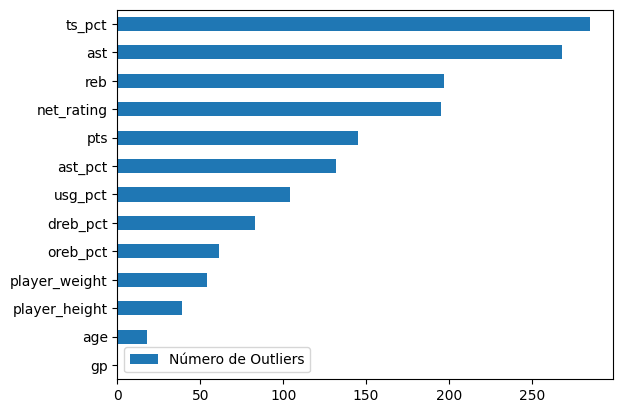

In [147]:
df_outliers_z_score.transpose().rename({0:"Número de Outliers"}, axis = 1).sort_values(by="Número de Outliers").plot(kind="barh")

##### **Análise dos Top 5 jogadores por temporada**

A análise do desempenho dos jogadores escolhidos nas primeiras cinco posições do draft da NBA é fundamental para entender o impacto que esses atletas têm em suas equipes. Ao filtrar apenas esses jogadores, conseguimos avaliar suas estatísticas, como pontos marcados, altura e peso, revelando se estão atendendo às expectativas de alto potencial.

Além disso, agrupar os dados por temporada nos permite identificar tendências de desempenho ao longo do tempo, ajudando a descobrir quais características estão associadas ao sucesso na liga. Essa análise é essencial para informar futuras decisões de contratação, garantindo que a equipe busque jogadores que realmente possam contribuir para o sucesso do time.

In [148]:
# Criar um df top5 que vai filtrar apenas os draft_number de 1 a 5

top_5_draft_number = df_updated[df_updated['draft_number'] <= 5].reset_index()

# Tirar os valores 0 do df

top_5_draft_number = top_5_draft_number[top_5_draft_number['draft_number'] != 0]

# agrupar por season

agrupado = top_5_draft_number.groupby('season')[['draft_number', 'player_name', 'player_height', 'player_weight', 'pts']].value_counts()
agrupado

season  draft_number  player_name        player_height  player_weight  pts 
1996    1             Allen Iverson      182.88         74.842680      23.5    1
                      Chris Webber       208.28         111.130040     20.1    1
                      Danny Manning      208.28         106.140528     13.5    1
                      David Robinson     215.90         106.594120     17.7    1
                      Derrick Coleman    208.28         117.933920     18.1    1
                                                                              ..
2022    5             Jonas Valanciunas  210.82         120.201880     14.1    1
                      Kevin Love         203.20         113.851592     8.2     1
                      Kris Dunn          190.50         92.986360      13.2    1
                      Ricky Rubio        187.96         86.182480      5.2     1
                      Trae Young         185.42         74.389088      26.2    1
Name: count, Length: 1728, dtype:

In [149]:
top_5 = top_5_draft_number.groupby('season').agg({'player_name': 'count', 'pts': 'sum', 'reb': 'sum', 'player_height': 'mean', 'player_weight': 'mean', 'ts_pct': 'mean'}).reset_index()

#incluir duas colunas no dataframe: pts/player_height e reb/player_height

top_5['pts_per_player'] = top_5['pts'] / top_5['player_name']
top_5['reb_per_player'] = top_5['reb'] / top_5['player_name']
top_5

season  player_name    pts    reb  player_height  player_weight    ts_pct  \
0     1996           61  935.2  356.8     203.955082     103.735730  0.526164   
1     1997           62  911.8  360.2     204.019355     103.916464  0.523194   
2     1998           63  866.9  374.2     204.369206     105.010148  0.513889   
3     1999           67  951.9  398.5     204.147761     104.461561  0.517090   
4     2000           66  913.0  388.1     203.469394     103.583919  0.519561   
5     2001           65  909.3  385.2     204.137846     104.619250  0.523200   
6     2002           64  870.4  366.4     204.350937     104.758490  0.522203   
7     2003           64  849.9  366.3     204.549375     105.545188  0.511016   
8     2004           67  898.5  373.6     204.223582     104.752672  0.526493   
9     2005           65  901.4  370.1     203.551692     104.193572  0.538154   
10    2006           63  890.6  376.5     203.562857     105.406141  0.540619   
11    2007           63  859.5  367.7     203.320952     105.514139  0.535111   
12    2008           67  890.2  380.0     203.200000     105.077633  0.545194   
13    2009           64  843.0  359.6     203.160313     104.907325  0.543172   
14    2010           66  871.8  371.3     203.200000     105.075274  0.537697   
15    2011           66  821.0  344.6     202.584242     104.216198  0.522727   
16    2012           69  823.9  350.6     203.163188     104.681145  0.522377   
17    2013           63  821.0  339.1     202.675873     103.627772  0.535365   
18    2014           64  827.8  340.9     202.565000     102.965384  0.539469   
19    2015           64  849.1  359.8     203.239688     103.801694  0.540734   
20    2016           63  866.1  351.0     202.877460     102.727788  0.551175   
21    2017           65  920.3  367.0     202.613846     101.779066  0.552800   
22    2018           67  974.5  385.3     202.479701     101.570758  0.553896   
23    2019           61  948.5  349.5     201.034754     102.311022  0.561820   
24    2020           61  985.2  350.1     200.909836     102.177175  0.565115   
25    2021           60  958.9  335.2     200.617667     100.652065  0.569867   
26    2022           58  991.5  319.6     200.353448      99.665111  0.577828   

    pts_per_player  reb_per_player  
0        15.331148        5.849180  
1        14.706452        5.809677  
2        13.760317        5.939683  
3        14.207463        5.947761  
4        13.833333        5.880303  
5        13.989231        5.926154  
6        13.600000        5.725000  
7        13.279687        5.723438  
8        13.410448        5.576119  
9        13.867692        5.693846  
10       14.136508        5.976190  
11       13.642857        5.836508  
12       13.286567        5.671642  
13       13.171875        5.618750  
14       13.209091        5.625758  
15       12.439394        5.221212  
16       11.940580        5.081159  
17       13.031746        5.382540  
18       12.934375        5.326562  
19       13.267188        5.621875  
20       13.747619        5.571429  
21       14.158462        5.646154  
22       14.544776        5.750746  
23       15.549180        5.729508  
24       16.150820        5.739344  
25       15.981667        5.586667  
26       17.094828        5.510345

## Parte II - SÉRIES TEMPORAIS (data de entrega: 21/10/2024)

In [150]:
df_updated.head()

player_name  player_height  player_weight                college  \
0  Randy Livingston         193.04      94.800728        Louisiana State   
1  Gaylon Nickerson         190.50      86.182480  Northwestern Oklahoma   
2      George Lynch         203.20     103.418976         North Carolina   
3    George McCloud         203.20     102.058200          Florida State   
4      George Zidek         213.36     119.748288                   UCLA   

   draft_number  gp   pts  reb  ast  net_rating  usg_pct  ts_pct  season  
0            42  64   3.9  1.5  2.4         0.3    0.169   0.487    1996  
1            34   4   3.8  1.3  0.3         8.9    0.174   0.497    1996  
2            12  41   8.3  6.4  1.9        -8.2    0.175   0.512    1996  
3             7  64  10.2  2.8  1.7        -2.7    0.206   0.527    1996  
4            22  52   2.8  1.7  0.3       -14.1    0.195   0.500    1996

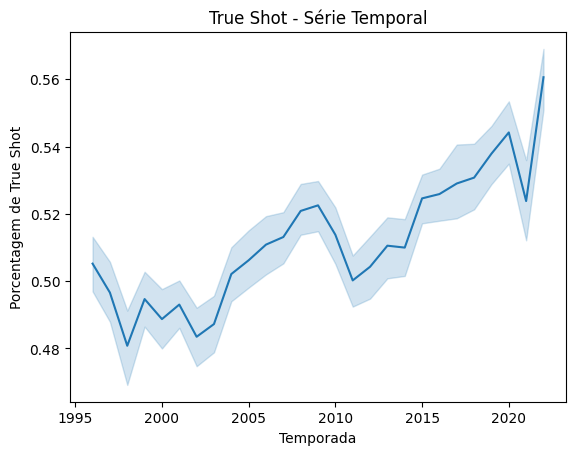

In [151]:
sns.lineplot(x='season', y='ts_pct', data=df_updated)

plt.xlabel('Temporada')
plt.ylabel('Porcentagem de True Shot')
plt.title('True Shot - Série Temporal')
plt.show()

# Série temporal ascendente

O gráfico apresenta uma tendência geral de aumento no True Shot Percentage (ts_pct) ao longo das temporadas. A linha azul representa a média do True Shot Percentage (ts_pct) para cada temporada, enquanto a área sombreada indica o intervalo de confiança, mostrando a variação dos dados em torno da média.

Podemos observar que, em média, a porcentagem de arremessos efetivos dos jogadores aumentou ao longo do tempo. No entanto, é importante notar que há uma certa variabilidade entre as temporadas, com alguns anos apresentando valores mais altos e outros mais baixos. Essa variação pode ser influenciada por diversos fatores, como mudanças nas regras do jogo, evolução das técnicas de arremesso, ou até mesmo flutuações aleatórias nos dados.

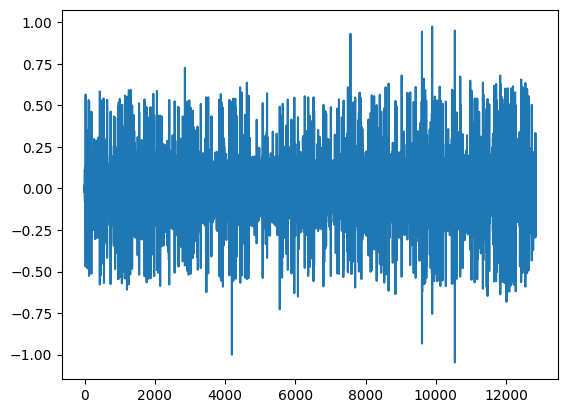

In [185]:
#Criar uma variável com a diferença diária
df_updated["variation_ts"] = df_updated["ts_pct"].diff()

#Plotar as diferenças
plt.plot(df_updated["variation_ts"], label = "Variação do ts-pct")
plt.show()

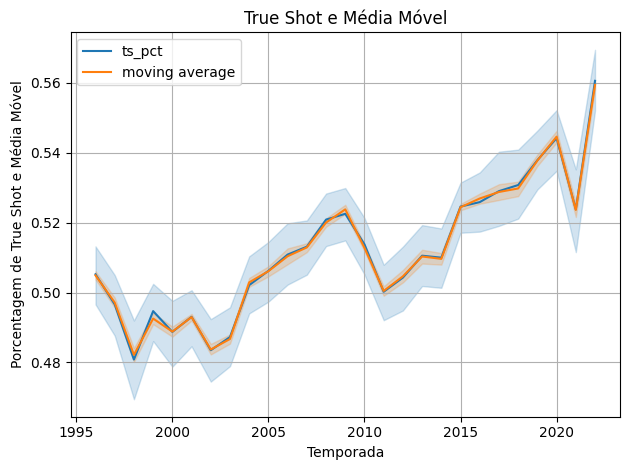

In [153]:
# Aplicando a média móvel
df_updated["moving average_ts"] = df_updated["ts_pct"].rolling(window=30).mean()

#plotar a série temporal suavizada
sns.lineplot(x='season', y='ts_pct', data=df_updated, label='ts_pct')
sns.lineplot(x='season', y='moving average_ts', data=df_updated, label='moving average')


#Adicionar títulos e rótulos
plt.title("True Shot e Média Móvel")
plt.xlabel("Temporada")
plt.ylabel("Porcentagem de True Shot e Média Móvel")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

A linha azul representa o valor real do True Shot Percentage em cada temporada, enquanto a linha laranja representa a média móvel, que suaviza as flutuações dos dados e permite identificar tendências de longo prazo. A área sombreada em azul claro indica o intervalo de confiança, mostrando a variação dos dados em torno da média.

Analisando o gráfico, é possivel ver um aumento gradual no True Shot Percentage (ts_pct) ao longo dos anos, com algumas oscilações ao longo do tempo. A média móvel confirma essa tendência de crescimento, indicando que, em média, os jogadores têm se tornado mais eficientes nos arremessos ao longo das temporadas. No entanto, é importante notar que a variação entre as temporadas é considerável, com alguns anos apresentando valores acima da média e outros abaixo. Essa variação pode ser influenciada por diversos fatores, como mudanças nas regras do jogo, evolução das técnicas de arremesso, ou até mesmo flutuações aleatórias nos dados.

##### **Decompondo nossa série temporal**

Quais são os componentes da série temporal? Faça a análise de tais componentes e
plote os gráficos.

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [155]:
df_updated['ts_pct'].describe()

count    12844.000000
mean         0.513138
std          0.101724
min          0.000000
25%          0.482000
50%          0.525000
75%          0.563000
max          1.500000
Name: ts_pct, dtype: float64

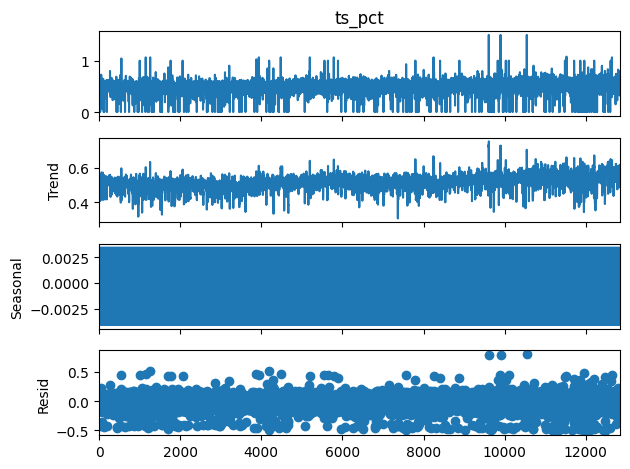

In [156]:
serie_decompose = seasonal_decompose(
    df_updated["ts_pct"],
    model = "additive",
    period = 6
)

serie_decompose.plot()

plt.show()

A série temporal "ts_pct" apresenta uma leve tendência de crescimento ao longo do tempo, mas a maior parte da variabilidade nos dados é explicada por um componente aleatório, sem evidências de sazonalidade.

##### **Verificando se os resíduos seguem uma distribuição normal**

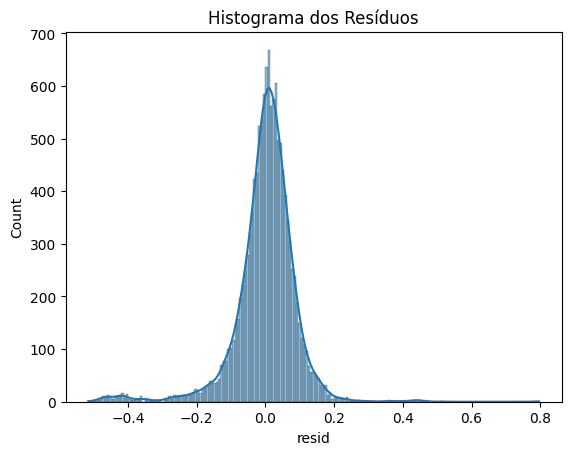

In [157]:
# Resíduos da decomposição
resid = serie_decompose.resid.dropna()

# Histograma
sns.histplot(resid, kde=True)
plt.title('Histograma dos Resíduos')
plt.show()

O histograma dos resíduos (as diferenças entre os valores observados e os previstos pelo modelo) mostra que os dados não seguem exatamente uma distribuição normal, mas chegam perto. Em um gráfico de distribuição normal, os dados formam uma curva em formato de sino, com a maioria dos valores concentrados no meio e poucos valores nas extremidades. No entanto, no nosso caso, embora a distribuição pareça simétrica em torno de zero, existem algumas diferenças.

As "caudas" da distribuição (as partes mais distantes do centro) são um pouco mais longas do que o esperado, o que significa que temos mais valores extremos do que veríamos em uma distribuição perfeitamente normal. Além disso, a parte central da distribuição é um pouco mais "pontuda", indicando que os valores estão mais concentrados no meio do que em uma curva normal.

Essas diferenças sugerem que a distribuição dos resíduos tem algumas peculiaridades, mas ainda está relativamente próxima da normalidade. Pequenos desvios como esses geralmente não afetam gravemente o modelo. No entanto, em alguns casos, pode ser útil considerar ajustes ou métodos mais robustos para melhorar o modelo.

Resumindo, o histograma dos resíduos mostra que os dados não são exatamente normais, mas estão próximos disso, com alguns desvios que podem ser considerados em análises mais avançadas.

In [158]:
# Teste de Shapiro-Wilk
stat, p = stats.shapiro(resid)
print(f'Teste de Shapiro-Wilk: estatística={stat}, p-valor={p}')
if p > 0.05:
    print('Os resíduos seguem uma distribuição normal (não rejeitamos H0).')
else:
    print('Os resíduos não seguem uma distribuição normal (rejeitamos H0).')

Teste de Shapiro-Wilk: estatística=0.8644453245433691, p-valor=9.060704606583063e-74
Os resíduos não seguem uma distribuição normal (rejeitamos H0).


C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12838.
  res = hypotest_fun_out(*samples, **kwds)


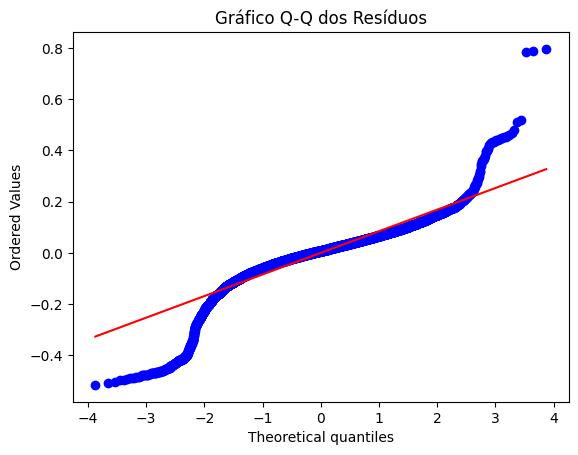

In [159]:
# Gráfico Q-Q
stats.probplot(resid, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

Ao analisar o Gráfico Q-Q, observamos que os pontos se desviam da linha de referência, o que sugere que os dados não seguem uma distribuição normal. Se a distribuição fosse normal, os pontos (representados em azul) estariam próximos da linha de referência (linha vermelha). Os desvios mais evidentes nas extremidades reforçam essa falta de normalidade, como também foi confirmado pelo teste Shapiro-Wilk.

Vale notar que, em alguns casos, é possível observar pequenos desvios nas extremidades com os pontos ainda alinhados no centro. Embora isso indique alguma falta de normalidade, dependendo da aplicação, esses desvios podem ser considerados aceitáveis, permitindo o uso de modelos que assumem uma distribuição normal.

In [160]:
resultado_teste = adfuller(df_updated['ts_pct'])
resultado_teste

(np.float64(-11.206495256466088),
 np.float64(2.17823230785304e-20),
 40,
 12803,
 {'1%': np.float64(-3.430860865545853),
  '5%': np.float64(-2.8617657776261827),
  '10%': np.float64(-2.5668901764743968)},
 np.float64(-22381.959289422302))

In [161]:
if resultado_teste[1] < 0.05:
    print("É estacionária")
else:
    print("Nâo é estacionária")

É estacionária


##### **Análise de Net Rating**

O Net Rating determina o rendimento de uma equipe a cada 100 posses. É calculado a partir do saldo entre o Offensive Rating (número de pontos marcados a cada 100 posses) e o Defensive Rating (número de pontos sofridos a cada 100 posses). É uma forma que os estudiosos do jogo encontraram para avaliar, de uma maneira geral, o rendimento de equipes sem ter uma visão distorcida pelos diferentes ritmos de jogo impostos por cada uma.

Neste dataset temos o Net Rating de cada jogador, ou seja, a diferença de pontos ofensivos e defensivos da equipe quando determinado jogador estava em quadra.


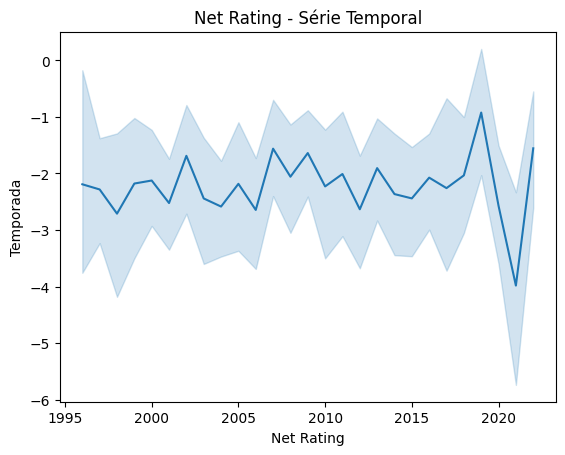

In [162]:
sns.lineplot(x='season', y='net_rating', data=df_updated)

plt.xlabel('Net Rating')
plt.ylabel('Temporada')
plt.title('Net Rating - Série Temporal')
plt.show()


O gráfico apresenta uma série temporal do "Net Rating" ao longo das temporadas. A linha azul representa o valor médio do Net Rating para cada temporada, enquanto a área sombreada indica o intervalo de confiança, mostrando a variação dos dados em torno da média. Observa-se uma grande variabilidade no Net Rating ao longo do tempo, sem uma tendência clara de aumento ou diminuição. A média geral se mantém relativamente estável ao redor de -2, sugerindo que, em média, o desempenho das equipes tem sido similar ao longo das temporadas. No entanto, é importante ressaltar que a variação entre as temporadas é considerável, com alguns anos apresentando valores bem acima da média e outros bem abaixo. Essa variação pode ser influenciada por diversos fatores, como mudanças nas regras do jogo, lesões de jogadores chave, ou até mesmo flutuações aleatórias no desempenho das equipes.

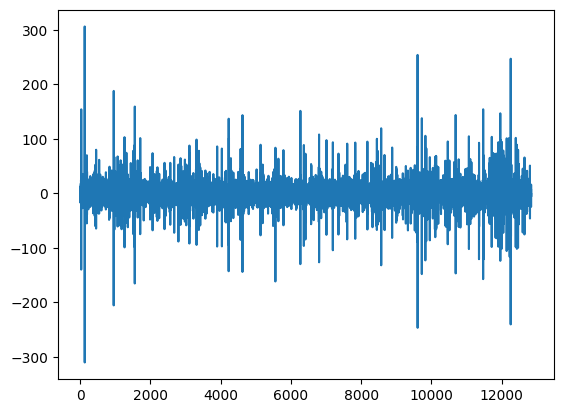

In [163]:
#Criar uma variável com a diferença diária
df_updated["variation_net"] = df_updated["net_rating"].diff()

#Plotar as diferenças
plt.plot(df_updated["variation_net"], label = "Variação do net_rating")
plt.show()

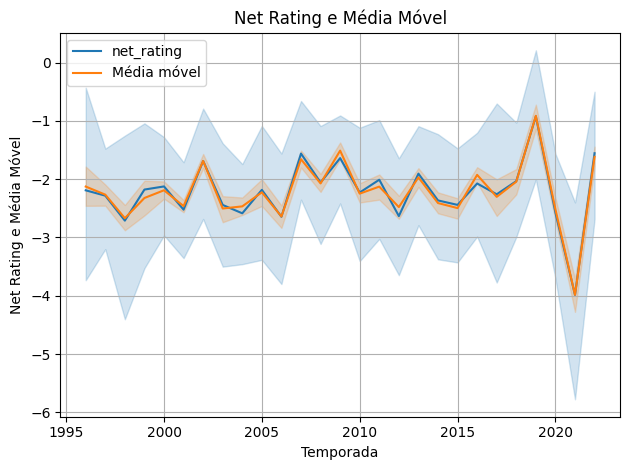

In [164]:
# Aplicando a média móvel
df_updated["moving average_net"] = df_updated["net_rating"].rolling(window=30).mean()

#plotar a série temporal suavizada
sns.lineplot(x='season', y='net_rating', data=df_updated, label='net_rating')
sns.lineplot(x='season', y='moving average_net', data=df_updated, label='Média móvel')


#Adicionar títulos e rótulos
plt.title("Net Rating e Média Móvel")
plt.xlabel("Temporada")
plt.ylabel('Net Rating e Média Móvel')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Ao analisar o gráfico de net rating e a média móvel, observa-se uma relativa estabilidade até 2019, seguida por um aumento no valor médio da variável. Após esse pico, ocorre uma queda acentuada até 2021, momento em que os valores voltam a crescer gradualmente até o último registro.

Também é possível notar que os valores médios de net rating para todos os jogadores permanecem negativos ao longo dos anos. Isso indica que a maioria dos jogadores não consegue impactar positivamente o jogo de forma consistente, ou seja, suas equipes acabam sofrendo mais pontos do que fazendo enquanto eles estão em quadra. Vale lembrar que é comum uma alta rotação de jogadores durante os jogos, o que pode influenciar esses números.

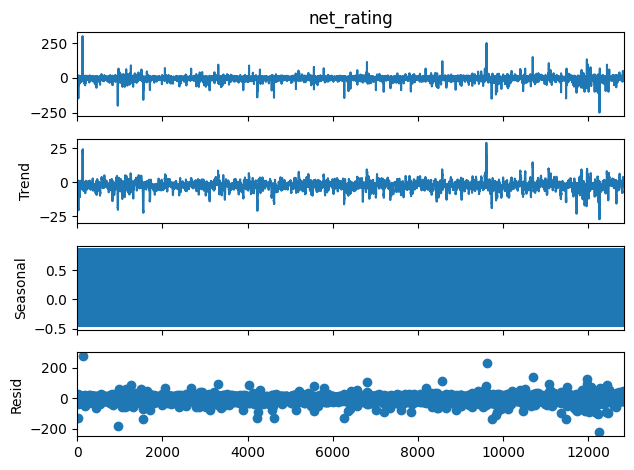

In [165]:
serie_decompose = seasonal_decompose(
    df_updated["net_rating"],
    model = "additive",
    period = 12
)

serie_decompose.plot()

plt.show()

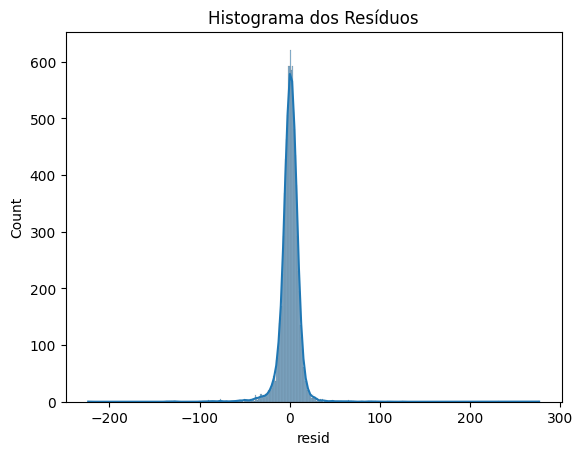

In [166]:
# verificando se os resíduos seguem uma série temporal
# Resíduos da decomposição
resid = serie_decompose.resid.dropna()

# Histograma
sns.histplot(resid, kde=True)
plt.title('Histograma dos Resíduos')
plt.show()

In [167]:
# Teste de Shapiro-Wilk
stat, p = stats.shapiro(resid)
print(f'Teste de Shapiro-Wilk: estatística={stat}, p-valor={p}')
if p > 0.05:
    print('Os resíduos seguem uma distribuição normal (não rejeitamos H0).')
else:
    print('Os resíduos não seguem uma distribuição normal (rejeitamos H0).')

Teste de Shapiro-Wilk: estatística=0.7327583739504798, p-valor=6.287457728878384e-89
Os resíduos não seguem uma distribuição normal (rejeitamos H0).


C:\Users\priga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12832.
  res = hypotest_fun_out(*samples, **kwds)


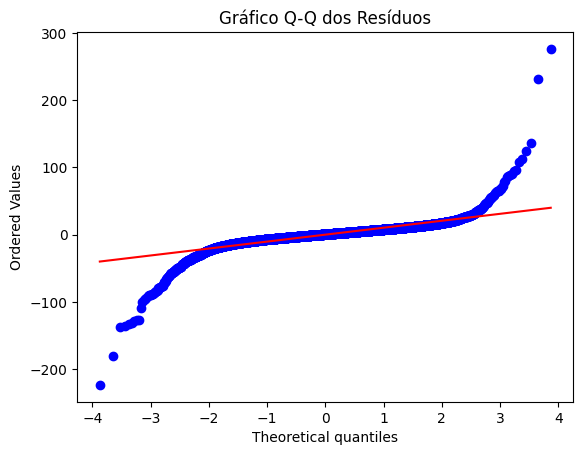

In [168]:
# Gráfico Q-Q
stats.probplot(resid, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

Ao analisar o Gráfico Q-Q, observamos um desvio em relação à linha de referência, não sendo esta uma distribuição normal.

In [169]:
# analisando a estacionariedade
resultado_teste = adfuller(df_updated['net_rating'])
resultado_teste

(np.float64(-112.90610034368142),
 0.0,
 0,
 12843,
 {'1%': np.float64(-3.4308592741179686),
  '5%': np.float64(-2.8617650743530723),
  '10%': np.float64(-2.566889802127102)},
 np.float64(101214.17683100815))

In [170]:
if resultado_teste[1] < 0.05:
    print("É estacionária")
else:
    print("Nâo é estacionária")

É estacionária


#### **Analisando de série temporal: o jogador LeBron James**

Após as considerações feitas ao final da apresentação sobre a decomposição das séries temporais, optamos então por experimentar fazer a mesma analise de séries temporais por jogador e aplicar ao jogador LeBron James. Ele não apenas apresenta uma das maiores frequências nas temporadas, mas também é amplamente reconhecido no mundo do basquete. Essa escolha nos permite explorar mais detalhadamente seu desempenho e impacto no jogo.

In [171]:
lebron = df_updated[df_updated['player_name'] == 'LeBron James']
lebron

player_name  player_height  player_weight  college  draft_number  gp  \
3448   LeBron James         203.20      108.86208  Unknown             1  79   
3616   LeBron James         203.20      108.86208  Unknown             1  80   
4103   LeBron James         203.20      108.86208  Unknown             1  79   
4807   LeBron James         203.20      108.86208  Unknown             1  78   
5133   LeBron James         203.20      113.39800  Unknown             1  75   
5387   LeBron James         203.20      113.39800  Unknown             1  81   
6099   LeBron James         203.20      113.39800  Unknown             1  76   
6585   LeBron James         203.20      113.39800  Unknown             1  79   
6746   LeBron James         203.20      113.39800  Unknown             1  62   
7585   LeBron James         203.20      113.39800  Unknown             1  76   
7977   LeBron James         203.20      113.39800  Unknown             1  77   
8190   LeBron James         203.20      113.39800  Unknown             1  69   
8979   LeBron James         203.20      113.39800  Unknown             1  76   
9176   LeBron James         203.20      113.39800  Unknown             1  74   
9671   LeBron James         203.20      113.39800  Unknown             1  82   
10565  LeBron James         203.20      113.39800  Unknown             1  55   
10958  LeBron James         205.74      113.39800  Unknown             1  67   
11595  LeBron James         205.74      113.39800  Unknown             1  45   
12108  LeBron James         205.74      113.39800  Unknown             1  56   
12733  LeBron James         205.74      113.39800  Unknown             1  55   

        pts  reb   ast  net_rating  usg_pct  ts_pct  season  variation_ts  \
3448   20.9  5.5   5.9        -2.6    0.280   0.488    2003        -0.005   
3616   27.2  7.4   7.2         1.9    0.297   0.554    2004        -0.021   
4103   31.4  7.0   6.6         4.2    0.336   0.568    2005         0.157   
4807   27.3  6.7   6.0         5.4    0.309   0.552    2006        -0.043   
5133   30.0  7.9   7.2         2.4    0.333   0.568    2007        -0.007   
5387   28.4  7.6   7.2        14.7    0.334   0.591    2008         0.076   
6099   29.7  7.3   8.6        10.8    0.333   0.604    2009         0.078   
6585   26.7  7.5   7.0        10.5    0.312   0.594    2010         0.146   
6746   27.1  7.9   6.2        10.7    0.317   0.605    2011         0.178   
7585   26.8  8.0   7.3        14.1    0.298   0.640    2012         0.131   
7977   27.1  6.9   6.3         7.9    0.309   0.649    2013         0.179   
8190   25.3  6.0   7.4         9.8    0.324   0.577    2014         0.019   
8979   25.3  7.4   6.8        11.0    0.311   0.588    2015         0.056   
9176   26.4  8.6   8.7         7.7    0.297   0.619    2016         0.110   
9671   27.5  8.6   9.1         1.6    0.310   0.621    2017         0.391   
10565  27.4  8.5   8.3         2.0    0.311   0.588    2018         0.096   
10958  25.3  7.8  10.2         8.5    0.308   0.577    2019         0.080   
11595  25.0  7.7   7.8         9.2    0.310   0.602    2020        -0.017   
12108  30.3  8.2   6.2        -2.5    0.317   0.619    2021         0.200   
12733  28.9  8.3   6.8         4.6    0.322   0.583    2022        -0.058   

       moving average_ts  variation_net  moving average_net  
3448            0.476433          -10.3            0.183333  
3616            0.477767            2.4           -4.093333  
4103            0.509233           16.8           -7.523333  
4807            0.535600           -4.3           -2.133333  
5133            0.519500           -1.3            1.360000  
5387            0.524300           19.4           -2.656667  
6099            0.500867            2.8           -0.506667  
6585            0.543033           18.1            1.036667  
6746            0.496467           27.8           -2.016667  
7585            0.510967           16.0            0.480000  
7977            0.514467   

In [172]:
lebron.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3448 to 12733
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         20 non-null     object 
 1   player_height       20 non-null     float64
 2   player_weight       20 non-null     float64
 3   college             20 non-null     object 
 4   draft_number        20 non-null     int64  
 5   gp                  20 non-null     int64  
 6   pts                 20 non-null     float64
 7   reb                 20 non-null     float64
 8   ast                 20 non-null     float64
 9   net_rating          20 non-null     float64
 10  usg_pct             20 non-null     float64
 11  ts_pct              20 non-null     float64
 12  season              20 non-null     int64  
 13  variation_ts        20 non-null     float64
 14  moving average_ts   20 non-null     float64
 15  variation_net       20 non-null     float64
 16  moving av

##### **Evolução da Eficiência nos Arremessos na NBA (2003-2022)**

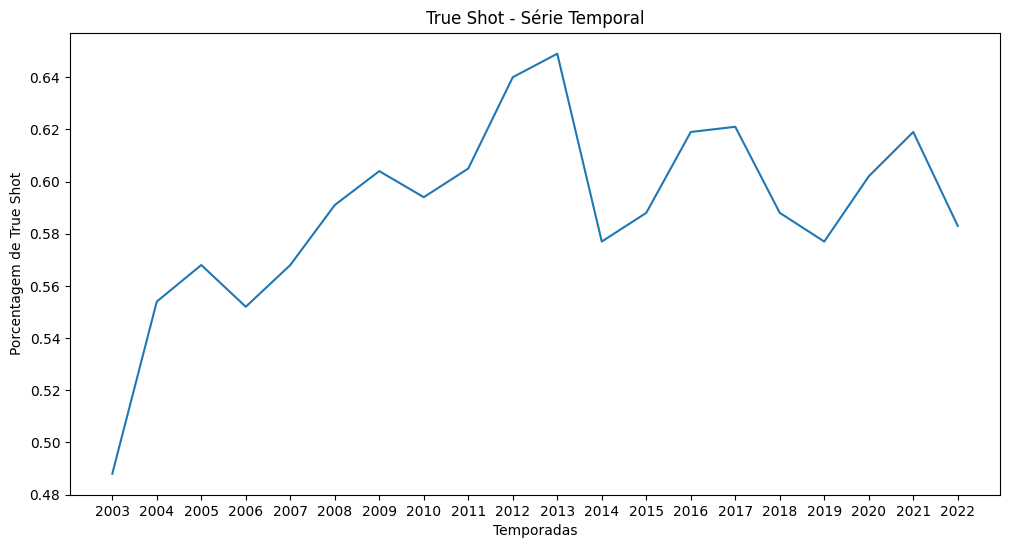

In [173]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='ts_pct', data=lebron)

plt.xlabel('Temporadas')
plt.ylabel('Porcentagem de True Shot')
plt.title('True Shot - Série Temporal')
plt.xticks(lebron['season'])
plt.show()


O gráfico apresentado mostra a evolução do True Shot Percentage (TSP) do jogador LeBron James na NBA de 2003 a 2022, indicando uma tendência geral de aumento na eficiência dos arremessos do jogadore ao longo dos anos. Embora essa tendência não seja linear e apresente flutuações, fatores como melhorias nas técnicas de arremesso, mudanças nas regras do jogo e a evolução física do atleta podem ter contribuído para esse crescimento. Em resumo, o TSP reflete um progresso na eficiência dos arremessos, embora a performance individual possa variar por diversas razões, como estilo de jogo e condições adversárias.

##### **Flutuações na eficiência de arremessos de LeBron James**

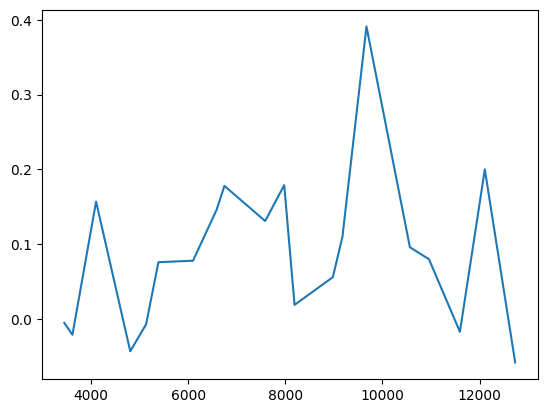

In [187]:
#Plotar as diferenças
plt.plot(lebron["variation_ts"], label = "Variação do ts-pct")
plt.show()

O gráfico apresentado ilustra a variação do True Shot Percentage (TSP) de LeBron James ao longo de sua carreira na NBA, refletindo sua eficiência nos arremessos, que inclui lances livres, arremessos de 2 e 3 pontos. Observamos uma grande variabilidade no TSP, com picos e quedas significativas em diferentes temporadas. Essa flutuação pode ser influenciada por fatores como adaptações a novas equipes e sistemas de jogo, lesões que impactam sua mobilidade e desempenho, o desgaste natural do envelhecimento e mudanças no seu estilo de jogo ao longo dos anos. Assim, embora o TSP forneça uma visão importante de sua eficiência, é fundamental considerar também outras métricas e aspectos que contribuem para o seu sucesso na NBA.

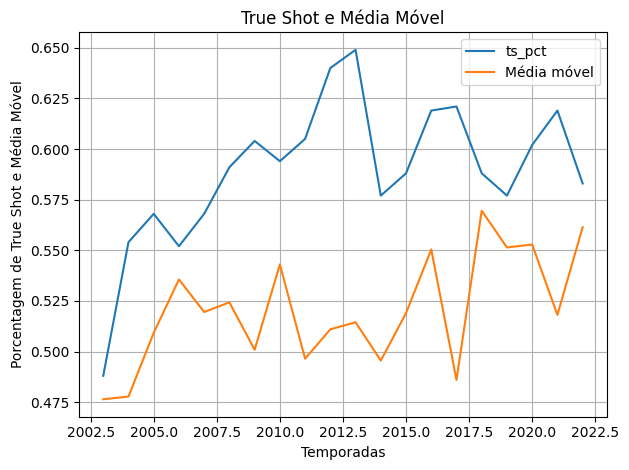

In [175]:
#plotar a série temporal suavizada
sns.lineplot(x='season', y='ts_pct', data=lebron, label='ts_pct')
sns.lineplot(x='season', y='moving average_ts', data=lebron, label='Média móvel')


#Adicionar títulos e rótulos
plt.title("True Shot e Média Móvel")
plt.xlabel("Temporadas")
plt.ylabel("Porcentagem de True Shot e Média Móvel")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

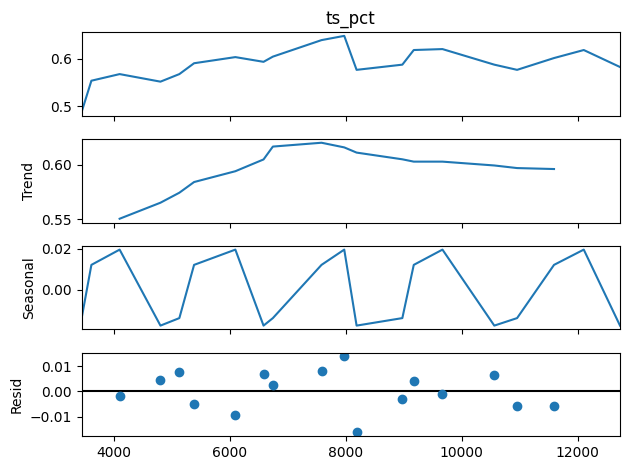

In [176]:
lebron_decompose = seasonal_decompose(
    lebron["ts_pct"],
    model = "additive",
    period = 4
)

lebron_decompose.plot()

plt.show()

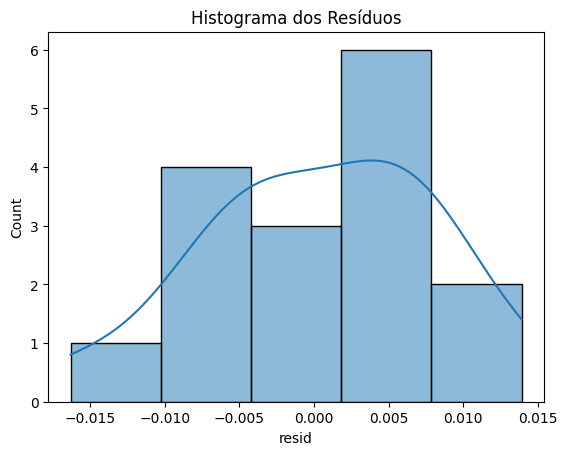

In [177]:
# Resíduos da decomposição
resid_lebron = lebron_decompose.resid.dropna()

# Histograma
sns.histplot(resid_lebron, kde=True)
plt.title('Histograma dos Resíduos')
plt.show()

In [178]:
# Teste de Shapiro-Wilk
stat, p = stats.shapiro(resid_lebron)
print(f'Teste de Shapiro-Wilk: estatística={stat}, p-valor={p}')
if p > 0.05:
    print('Os resíduos seguem uma distribuição normal (não rejeitamos H0).')
else:
    print('Os resíduos não seguem uma distribuição normal (rejeitamos H0).')

Teste de Shapiro-Wilk: estatística=0.9719492157206502, p-valor=0.8691098299194704
Os resíduos seguem uma distribuição normal (não rejeitamos H0).


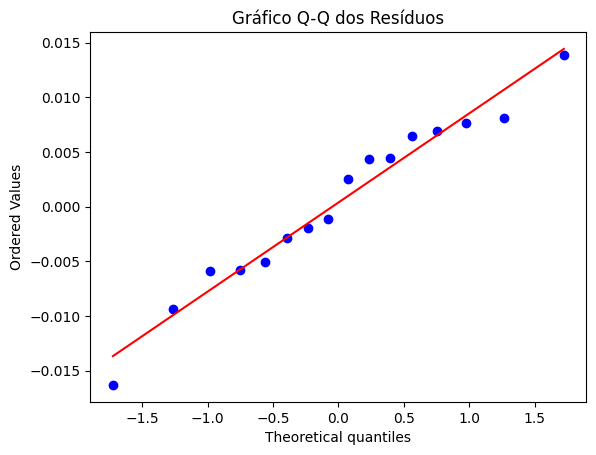

In [179]:
# Gráfico Q-Q
stats.probplot(resid_lebron, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

In [180]:
resultado_lebron = adfuller(lebron['ts_pct'])
resultado_lebron

(np.float64(-1.3323986156472458),
 np.float64(0.6142226880275184),
 8,
 11,
 {'1%': np.float64(-4.223238279489106),
  '5%': np.float64(-3.189368925619835),
  '10%': np.float64(-2.729839421487603)},
 np.float64(-54.44691748180725))

In [181]:
if resultado_lebron[1] < 0.05:
    print("É estacionária")
else:
    print("Nâo é estacionária")

Nâo é estacionária


Ao concluir esta analise de séries temporais por uma unica variável (do jogados LeBron James), pudemos perceber que este dataset ainda oferece muitas possibilidades de analises para identificar tendencias e evoluções nesse esporte ao longo dos anos.

Pudemos compreender que essa análise, mesmo em um dataset onde nem todos os jogadores têm a mesma quantidade de observações, é bastante relevante. Focar em um atleta permite explorar nuances em seu desempenho ao longo do tempo, revelando padrões que poderiam ser ofuscados em análises mais amplas. Essa abordagem destaca como variáveis específicas, como lesões ou mudanças de equipe, impactam o desempenho, proporcionando insights valiosos. Além disso, jogadores reconhecidos, como LeBron James, podem representar tendências que se aplicam a outros atletas, enriquecendo a análise e aprofundando o entendimento sobre as dinâmicas do basquete. Vale destacar que essa abordagem individual não só enriquece a análise, mas também contribui para um entendimento mais amplo do esporte.

# Conclusão

Após as analises realizadas pelo time de analistas de dados, podemos traçar algumas conclusões para determinar o perfil ideal de jogador e a melhor posição a ser considerada para contratação.

> Perfil do Jogador Adequado:
1. **Eficiência em Quadra (Net Rating)**:
   - Jogadores com **net rating positivo** são aqueles que contribuem diretamente para que o time faça mais pontos do que sofra enquanto estão em quadra. A análise mostrou que muitos jogadores têm valores negativos, mas focar em jogadores com **net rating consistentemente positivo** é fundamental, pois eles impactam de forma mais eficiente o jogo.
   
2. **Estabilidade e Consistência**:
   - Ao observar a **média móvel do desempenho** dos jogadores, aqueles que mostraram uma **tendência de crescimento estável ao longo do tempo** (especialmente após quedas em anos críticos como 2019-2021) indicam uma capacidade de adaptação e resiliência, características essenciais para contribuir de forma constante na próxima temporada.

3. **Capacidade de Contribuição Ofensiva e Defensiva**:
   - O jogador deve ter um equilíbrio entre **habilidades defensivas e ofensivas**, o que significa que além de marcar pontos, ele deve ser capaz de impedir que o time adversário pontue. Um bom **net rating** associado a um bom desempenho defensivo seria um forte indicador.

> Melhor Posição para o Jogador:
Embora a análise não tenha começado com uma definição da posição, a análise dos dados aponta para uma possível preferência:

- **A posição de armador (point guard)** pode ser uma das mais estratégicas para se focar, já que os armadores são responsáveis por controlar o ritmo do jogo, distribuir assistências e, em muitos casos, marcar pontos decisivos. Se o time precisa de um jogador com grande impacto no jogo, **um armador com bom net rating** e **habilidade de fazer a diferença em ambos os lados da quadra** (ofensivo e defensivo) pode ser crucial.
  
- **Ala (small forward)** também pode ser uma boa opção, já que jogadores dessa posição tendem a ser versáteis, contribuindo tanto com pontos quanto com defesa. Isso pode oferecer ao time uma maior flexibilidade tática.

> Concluindo...
Como analista de dados, a recomendação é focar em um jogador que:
- Tenha um **net rating positivo**, com desempenho consistente;
- Mostre **resiliência e crescimento** nas últimas temporadas;
- Ofereça uma combinação de **ofensiva e defensiva eficazes**;
- Possivelmente, jogue na **posição de armador ou ala**, onde a capacidade de influenciar o jogo de várias maneiras seria mais valorizada.

Essas características juntas podem ajudar o time a ter um jogador que impacte diretamente o desempenho e ofereça o impulso necessário para vencer a próxima temporada.

# OBRIGADO(A)!!